# **Computational Epistemology Data Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Time Analysis**

## Individual Time to lock

In [10]:
time_n9 = pd.read_csv('bernoulli_simulations/output/time_n9_pRange1.csv')
time_n9.head()

scenario which_arm_restricted  num_agents    p  sim_id  agent_id  \
0  baseline                  NaN           9  0.5       0         0   
1  baseline                  NaN           9  0.5       0         1   
2  baseline                  NaN           9  0.5       0         2   
3  baseline                  NaN           9  0.5       0         3   
4  baseline                  NaN           9  0.5       0         4   

   was_correct  time_to_lock  
0         True            14  
1         True            14  
2         True            14  
3         True            14  
4         True            14

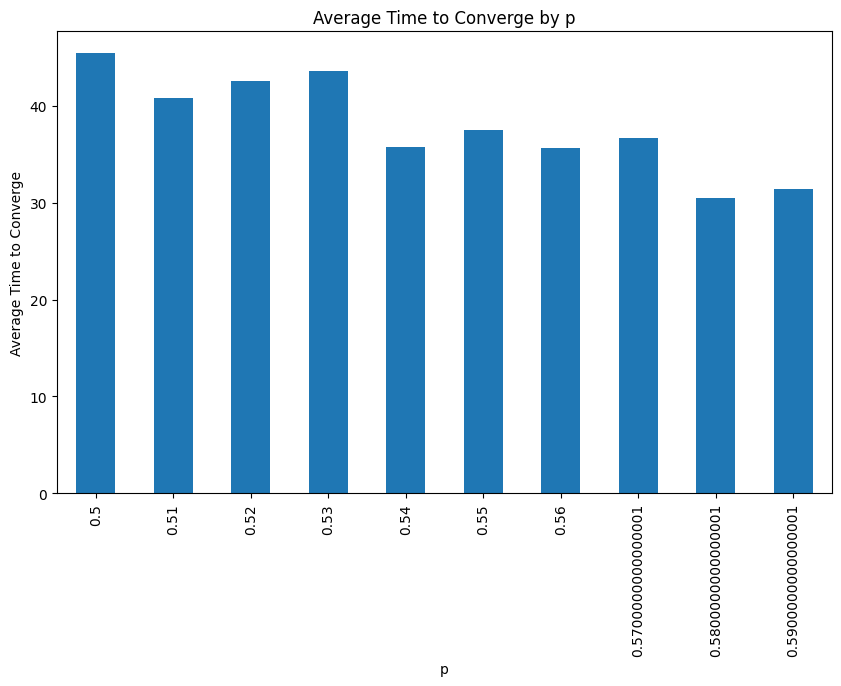

In [9]:
time_n9 = pd.read_csv('bernoulli_simulations/output/time_n9_pRange01.csv')

df_agg = time_n9.groupby(['sim_id', 'p']).agg({'was_correct': 'nunique', 'time_to_lock': 'max'}).reset_index()
df_agg = df_agg[df_agg['was_correct'] == 1]

plt.figure(figsize=(10, 6))
df_agg.groupby('p')['time_to_lock'].mean().plot(kind='bar')
plt.xlabel('p')
plt.ylabel('Average Time to Converge')
plt.title('Average Time to Converge by p')
plt.show()

In [8]:
df_agg = time_n9.groupby(['sim_id', 'p']).agg({'was_correct': 'nunique', 'time_to_lock': 'max'}).reset_index()

df_agg

sim_id    p  was_correct  time_to_lock
0          0  0.5            2           101
1          0  0.6            2            99
2          0  0.7            2            11
3          0  0.8            1             3
4          0  0.9            1             3
...      ...  ...          ...           ...
4995     999  0.5            2             8
4996     999  0.6            1            32
4997     999  0.7            1             9
4998     999  0.8            2             5
4999     999  0.9            1             1

[5000 rows x 4 columns]

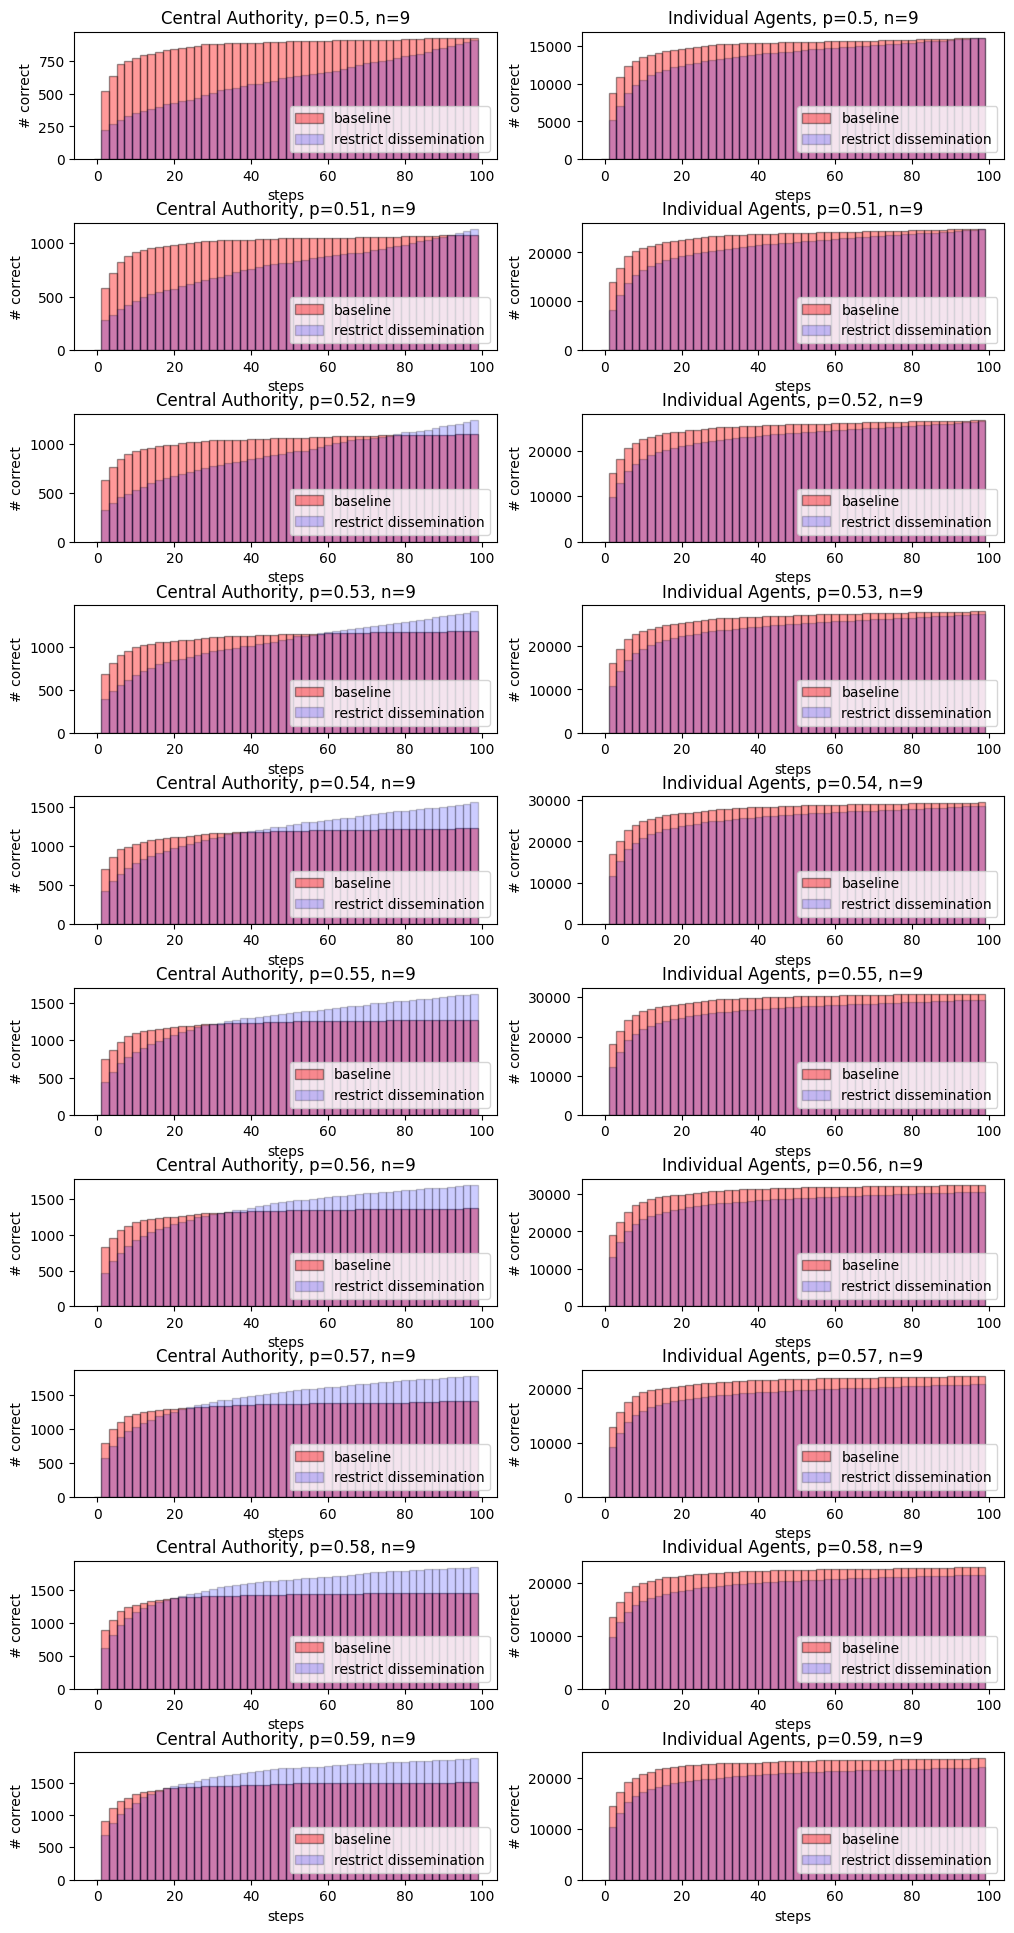

In [4]:
file = 'time_n9_pRange01.csv'
p = .59

plt.figure(figsize=(12, 24))
for i, p in enumerate(np.arange(.5, .6, .01)):
    p = round(p, 2)

    individual_time = pd.read_csv('bernoulli_simulations/output/' + file)

    comp_num_succ = []
    diss_num_succ = []
    individual_time = individual_time[individual_time['agent_id'] == 0]
    individual_time = individual_time[(individual_time['p'] >= p - .001) & (individual_time['p'] <= p + .001)]
    for steps in range(100):
        n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
        comp_num_succ.append(n)
        m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
        diss_num_succ.append(m)

    # Define the value of k
    k = 2

    # Calculate the cumulative sum of values grouped by k
    comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
    diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

    plt.subplot(10, 2, i * 2 + 1)
    plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
    plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
    plt.xlabel('steps')
    plt.ylabel('# correct')
    plt.title(f'Central Authority, p={p}, n=9')
    plt.legend(loc='lower right')
    #plt.show()

    individual_time = pd.read_csv('bernoulli_simulations/output/' + file)

    comp_num_succ = []
    diss_num_succ = []
    individual_time = individual_time[individual_time['agent_id'] != 0]
    individual_time = individual_time[(individual_time['p'] >= p - .01) & (individual_time['p'] <= p + .01)]
    for steps in range(100):
        n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
        comp_num_succ.append(n)
        m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
        diss_num_succ.append(m)

    # Define the value of k
    k = 2

    # Calculate the cumulative sum of values grouped by k
    comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
    diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

    plt.subplot(10, 2, i * 2 + 2)
    plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
    plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
    plt.xlabel('steps')
    plt.ylabel('# correct')
    plt.title(f'Individual Agents, p={p}, n=9')
    plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.5)
plt.show()


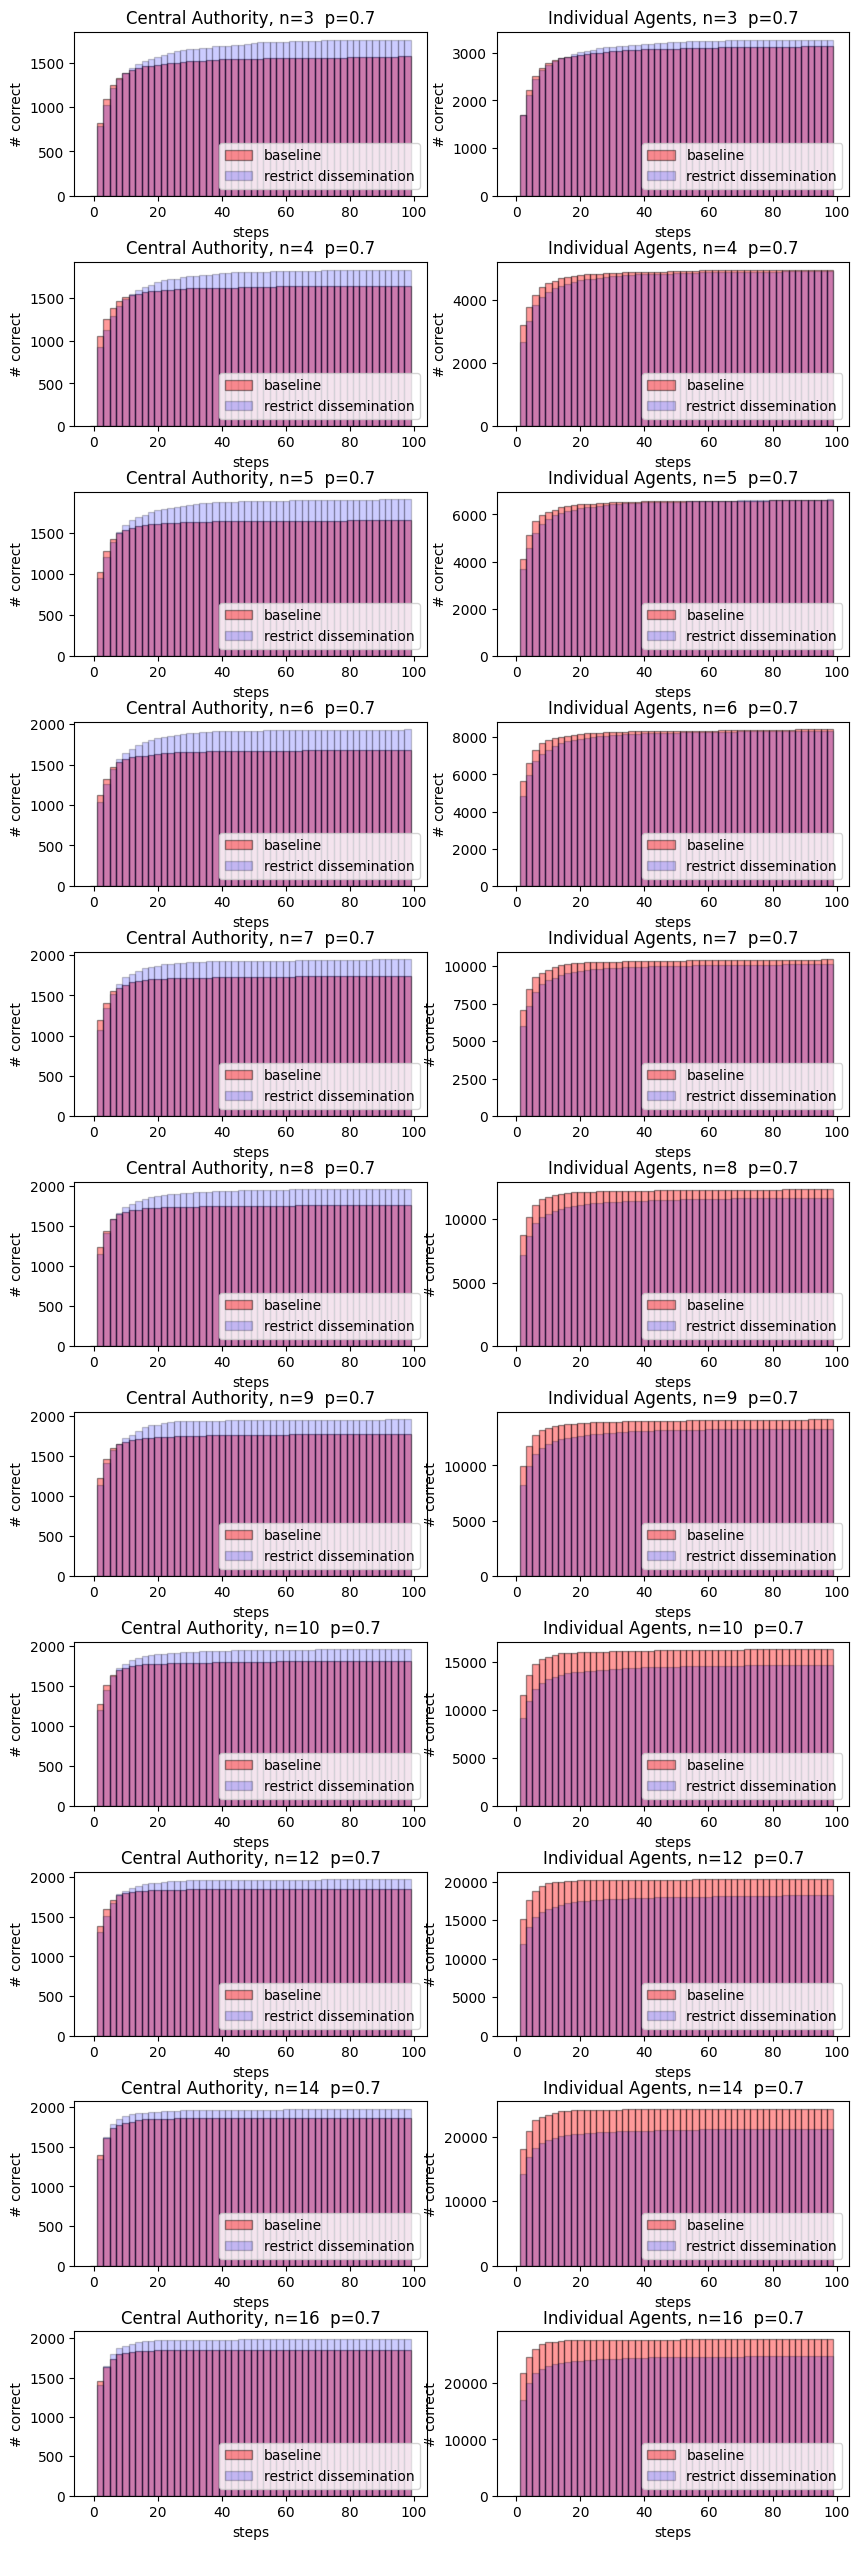

In [240]:
file = 'time_nRange_p7.csv'
n_agents = 7
p = .7

plt.figure(figsize=(10, 32))
for i, n_agents in enumerate([3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16]):

    individual_time = pd.read_csv('bernoulli_simulations/output/' + file)
    comp_num_succ = []
    diss_num_succ = []
    individual_time = individual_time[individual_time['agent_id'] == 0]
    individual_time = individual_time[(individual_time['num_agents'] == n_agents)]
    for steps in range(100):
        n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
        comp_num_succ.append(n)
        m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
        diss_num_succ.append(m)

    # Define the value of k
    k = 2

    # Calculate the cumulative sum of values grouped by k
    comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
    diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

    plt.subplot(11, 2, i * 2 + 1)
    plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
    plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
    plt.xlabel('steps')
    plt.ylabel('# correct')
    plt.title(f'Central Authority, n={n_agents}  p={p}')
    plt.legend(loc='lower right')

    individual_time = pd.read_csv('bernoulli_simulations/output/' + file)
    comp_num_succ = []
    diss_num_succ = []
    individual_time = individual_time[individual_time['agent_id'] != 0]
    individual_time = individual_time[(individual_time['num_agents'] == n_agents)]
    for steps in range(100):
        n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
        comp_num_succ.append(n)
        m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
        diss_num_succ.append(m)

    # Define the value of k
    k = 2

    # Calculate the cumulative sum of values grouped by k
    comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
    diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

    plt.subplot(11, 2, i * 2 + 2)
    plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
    plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
    plt.xlabel('steps')
    plt.ylabel('# correct')
    plt.title(f'Individual Agents, n={n_agents}  p={p}')
    plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Epsilon Greedy

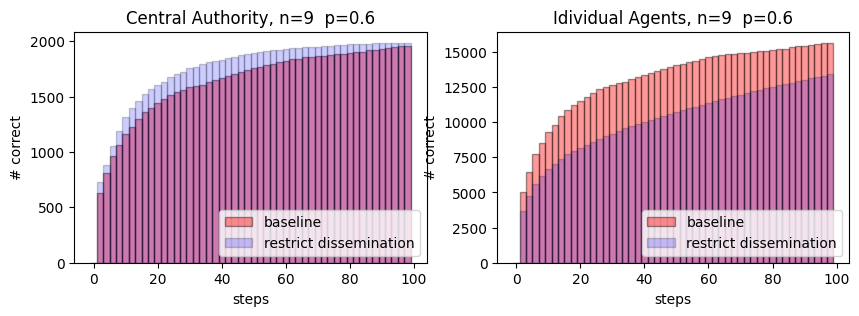

In [103]:
file = 'time_epsilon1_n9_p6.csv'
n_agents = 9
p = .6

plt.figure(figsize=(10, 3))
individual_time = pd.read_csv('bernoulli_simulations/output/' + file)
comp_num_succ = []
diss_num_succ = []
individual_time = individual_time[individual_time['agent_id'] == 0]
individual_time = individual_time[(individual_time['num_agents'] == n_agents)]
for steps in range(100):
    n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
    comp_num_succ.append(n)
    m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
    diss_num_succ.append(m)

# Define the value of k
k = 2

# Calculate the cumulative sum of values grouped by k
comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

plt.subplot(1, 2, 1)
plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
plt.xlabel('steps')
plt.ylabel('# correct')
plt.title(f'Central Authority, n={n_agents}  p={p}')
plt.legend(loc='lower right')


individual_time = pd.read_csv('bernoulli_simulations/output/' + file)
comp_num_succ = []
diss_num_succ = []
individual_time = individual_time[individual_time['agent_id'] != 0]
individual_time = individual_time[(individual_time['num_agents'] == n_agents)]
for steps in range(100):
    n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
    comp_num_succ.append(n)
    m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
    diss_num_succ.append(m)

# Define the value of k
k = 2

# Calculate the cumulative sum of values grouped by k
comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

plt.subplot(1, 2, 2)
plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
plt.xlabel('steps')
plt.ylabel('# correct')
plt.title(f'Individual Agents, n={n_agents}  p={p}')
plt.legend(loc='lower right')

## Inertia

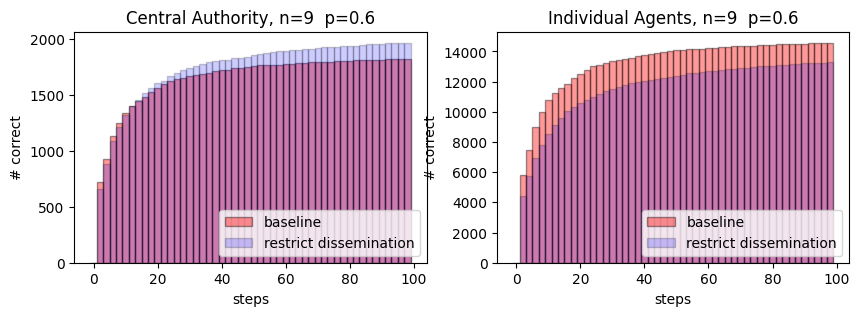

In [104]:
file = 'time_inertia5_n9_p6.csv'
n_agents = 9
p = .6

plt.figure(figsize=(10, 3))
individual_time = pd.read_csv('bernoulli_simulations/output/' + file)
comp_num_succ = []
diss_num_succ = []
individual_time = individual_time[individual_time['agent_id'] == 0]
individual_time = individual_time[(individual_time['num_agents'] == n_agents)]
for steps in range(100):
    n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
    comp_num_succ.append(n)
    m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
    diss_num_succ.append(m)

# Define the value of k
k = 2

# Calculate the cumulative sum of values grouped by k
comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

plt.subplot(1, 2, 1)
plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
plt.xlabel('steps')
plt.ylabel('# correct')
plt.title(f'Central Authority, n={n_agents}  p={p}')
plt.legend(loc='lower right')


individual_time = pd.read_csv('bernoulli_simulations/output/' + file)
comp_num_succ = []
diss_num_succ = []
individual_time = individual_time[individual_time['agent_id'] != 0]
individual_time = individual_time[(individual_time['num_agents'] == n_agents)]
for steps in range(100):
    n = len(individual_time[(individual_time['scenario'] == 'baseline') & (individual_time['was_correct'] == True) & (individual_time['time_to_lock'] < steps)])
    comp_num_succ.append(n)
    m = len(individual_time[(individual_time['scenario'] == 'restrict_dissemination') & (individual_time['was_correct'] == True)  & (individual_time['time_to_lock'] < steps)])
    diss_num_succ.append(m)

# Define the value of k
k = 2

# Calculate the cumulative sum of values grouped by k
comp_grouped_values = np.add.reduceat(comp_num_succ, range(0, len(comp_num_succ), k))
diss_grouped_values = np.add.reduceat(diss_num_succ, range(0, len(diss_num_succ), k))

plt.subplot(1, 2, 2)
plt.bar(range(0, len(comp_num_succ), k), comp_grouped_values, width=k, color='red', edgecolor='black', label='baseline', alpha=0.4)
plt.bar(range(0, len(diss_num_succ), k), diss_grouped_values, width=k, color='blue', edgecolor='black', label='restrict dissemination', alpha=0.2)
plt.xlabel('steps')
plt.ylabel('# correct')
plt.title(f'Individual Agents, n={n_agents}  p={p}')
plt.legend(loc='lower right')

# **Numerical Analysis**

In [27]:
d_b01_p5_o5_tR = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors5_other5_targetRange.csv')
d_b01_p5_o6_tR = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors5_other6_targetRange.csv')
d_b01_p33_o4_tR = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other4_targetRange.csv')
d_b01_p33_o5_tR = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other5_targetRange.csv')
d_b01_p33_o6_tR = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other6_targetRange.csv')
d_b01_p33_o6_tR_2 = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other6_targetRange_steps200.csv')
d_b01_pR_o4_t9 = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priorsRange_other4_target9.csv')


In [40]:
#plt.hist(d_b01_p33_o6_tR[d_b01_p33_o6_tR['scenario'] == 'restrict_dissemination']['avg_time_to_converge'], bins=range(0, 100, 5), alpha=0.5, label='restrict dissemination')

d_b01_p33_o6_tR['prob_success'] = d_b01_p33_o6_tR['n_success'] / d_b01_p33_o6_tR['n_runs']
d_b01_p33_o6_tR_2['prob_success'] = d_b01_p33_o6_tR_2['n_success'] / d_b01_p33_o6_tR_2['n_runs']

print(d_b01_p33_o6_tR[d_b01_p33_o6_tR['scenario'] == 'restrict_dissemination']['prob_success'].mean())
print(d_b01_p33_o6_tR_2[d_b01_p33_o6_tR_2['scenario'] == 'restrict_dissemination']['prob_success'].mean())

0.52005
0.5451499999999999


In [216]:
p33_o6_tR_s1000 = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other6_targetRange_steps1000.csv')
p33_o6_tR_s1000['prob_success'] = p33_o6_tR_s1000['n_success'] / p33_o6_tR_s1000['n_runs']
p33_o6_tR_s1000[p33_o6_tR_s1000['scenario'] == 'baseline'].describe()

num_agents_restricted  prior_ps[0]  prior_ps[1]  p_increment[0]  \
count                    0.0        20.00        20.00    2.000000e+01   
mean                     NaN         0.33         0.33    1.000000e-02   
std                      NaN         0.00         0.00    1.779789e-18   
min                      NaN         0.33         0.33    1.000000e-02   
25%                      NaN         0.33         0.33    1.000000e-02   
50%                      NaN         0.33         0.33    1.000000e-02   
75%                      NaN         0.33         0.33    1.000000e-02   
max                      NaN         0.33         0.33    1.000000e-02   

       p_increment[1]     max_ps[0]  max_ps[1]  avg_final_ps[0]  \
count    2.000000e+01  2.000000e+01  20.000000        20.000000   
mean     1.000000e-02  6.000000e-01   0.790000         0.475147   
std      1.779789e-18  1.139065e-16   0.118322         0.004303   
min      1.000000e-02  6.000000e-01   0.600000         0.466840   
25%      1.000000e-02  6.000000e-01   0.695000         0.472813   
50%      1.000000e-02  6.000000e-01   0.790000         0.475085   
75%      1.000000e-02  6.000000e-01   0.885000         0.477245   
max      1.000000e-02  6.000000e-01   0.980000         0.483280   

       avg_final_ps[1]  num_agents  n_steps   n_success  n_runs  \
count        20.000000        20.0     20.0   20.000000    20.0   
mean          0.569428         9.0   1000.0  499.250000  1000.0   
std           0.058049         0.0      0.0   17.201209     0.0   
min           0.473040         9.0   1000.0  467.000000  1000.0   
25%           0.521452         9.0   1000.0  490.750000  1000.0   
50%           0.567440         9.0   1000.0  497.500000  1000.0   
75%           0.623415         9.0   1000.0  509.000000  1000.0   
max           0.660520         9.0   1000.0  532.000000  1000.0   

       avg_time_to_converge  min_time_to_converge  median_time_to_converge  \
count             20.000000                  20.0                     20.0   
mean             634.639750                   3.0                   1000.0   
std               13.773204                   0.0                      0.0   
min              605.850000                   3.0                   1000.0   
25%              626.963000                   3.0                   1000.0   
50%              632.716500                   3.0                   1000.0   
75%              647.385500                   3.0                   1000.0   
max              657.611000                   3.0                   1000.0   

       max_time_to_converge  stnd_dev_time_to_converge  prob_success  
count                  20.0                  20.000000     20.000000  
mean                 1000.0                 479.533788      0.499250  
std                     0.0                   3.787845      0.017201  
min                  1000.0                 472.817857      0.467000  
25%                  1000.0                 476.076733      0.490750  
50%                  1000.0                 480.289763      0.497500  
75%                  1000.0                 481.845218      0.509000  
max                  1000.0                 486.781135      0.532000

In [245]:
p33_o6_tR_s1000.drop(columns=['num_agents_restricted', 'p_increment[1]']).sort_values(by=['scenario', 'max_ps[1]'])

scenario network_structure arm_restricted  prior_ps[0]  \
0                 baseline          complete            NaN         0.33   
2                 baseline          complete            NaN         0.33   
4                 baseline          complete            NaN         0.33   
6                 baseline          complete            NaN         0.33   
8                 baseline          complete            NaN         0.33   
10                baseline          complete            NaN         0.33   
12                baseline          complete            NaN         0.33   
14                baseline          complete            NaN         0.33   
16                baseline          complete            NaN         0.33   
18                baseline          complete            NaN         0.33   
20                baseline          complete            NaN         0.33   
22                baseline          complete            NaN         0.33   
24                baseline          complete            NaN         0.33   
26                baseline          complete            NaN         0.33   
28                baseline          complete            NaN         0.33   
30                baseline          complete            NaN         0.33   
32                baseline          complete            NaN         0.33   
34                baseline          complete            NaN         0.33   
36                baseline          complete            NaN         0.33   
38                baseline          complete            NaN         0.33   
1   restrict_dissemination              star         random         0.33   
3   restrict_dissemination              star         random         0.33   
5   restrict_dissemination              star         random         0.33   
7   restrict_dissemination              star         random         0.33   
9   restrict_dissemination              star         random         0.33   
11  restrict_dissemination              star         random         0.33   
13  restrict_dissemination              star         random         0.33   
15  restrict_dissemination              star         random         0.33   
17  restrict_dissemination              star         random         0.33   
19  restrict_dissemination              star         random         0.33   
21  restrict_dissemination              star         random         0.33   
23  restrict_dissemination              star         random         0.33   
25  restrict_dissemination              star         random         0.33   
27  restrict_dissemination              star         random         0.33   
29  restrict_dissemination              star         random         0.33   
31  restrict_dissemination              star         random         0.33   
33  restrict_dissemination              star         random         0.33   
35  restrict_dissemination              star         random         0.33   
37  restrict_dissemination              star         random         0.33   
39  restrict_dissemination              star         random         0.33   

    prior_ps[1]  p_increment[0]  max_ps[0]  max_ps[1]  avg_final_ps[0]  \
0          0.33            0.01        0.6       0.60         0.477380   
2          0.33            0.01        0.6       0.62         0.469740   
4          0.33            0.01        0.6       0.64         0.470670   
6          0.33            0.01        0.6       0.66         0.474090   
8          0.33            0.01        0.6       0.68         0.482110   
10         0.33            0.01        0.6       0.70         0.474560   
12         0.33            0.01        0.6       0.72         0.476670   
14         0.33            0.01        0.6       0.74         0.468360   
16         0.33            0.01        0.6       0.76         0.472580   
18         0.33            0.01        0.6       0.78         0.474560   
20         0.33            0.01        0.6       0.80         0.476170   
22         0.

# **Success Graphs**

## Resiliant Agents

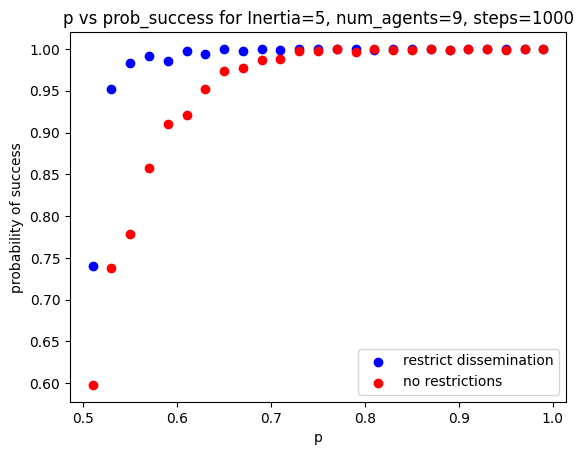

In [105]:
test_inc = pd.read_csv('bernoulli_simulations/output/resiliance_n9_pRange_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['ps[1]'], dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(dyn_comp['ps[1]'], dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

plt.title('p vs prob_success for Inertia=5, num_agents=9, steps=1000')
plt.xlabel('p')
plt.ylabel('probability of success')
plt.legend(loc='lower right')
plt.show()

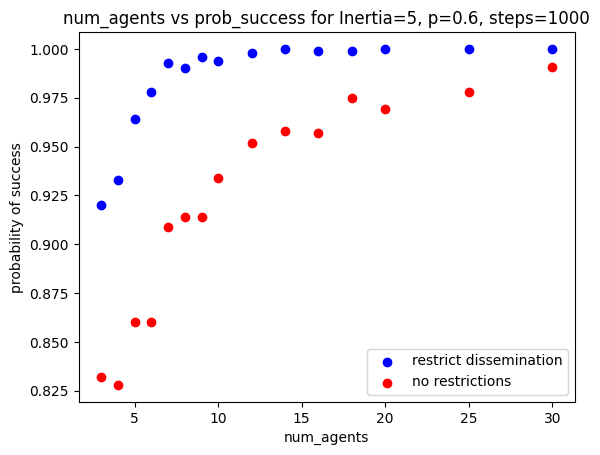

In [106]:
test_inc = pd.read_csv('bernoulli_simulations/output/resiliance_nRange_p6_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['num_agents'], dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(dyn_comp['num_agents'], dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

plt.title('num_agents vs prob_success for Inertia=5, p=0.6, steps=1000')
plt.xlabel('num_agents')
plt.ylabel('probability of success')
plt.legend(loc='lower right')
plt.show()

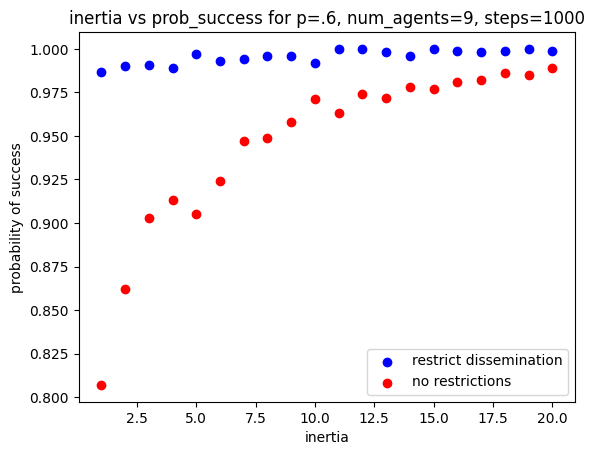

In [96]:
test_inc = pd.read_csv('bernoulli_simulations/output/resilianceRange_n9_p6_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(np.arange(1, 21, 1), dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(np.arange(1, 21, 1), dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

plt.title('inertia vs prob_success for p=.6, num_agents=9, steps=1000')
plt.xlabel('inertia')
plt.ylabel('probability of success')
plt.legend(loc='lower right')
plt.show()

## Epsilon Greedy

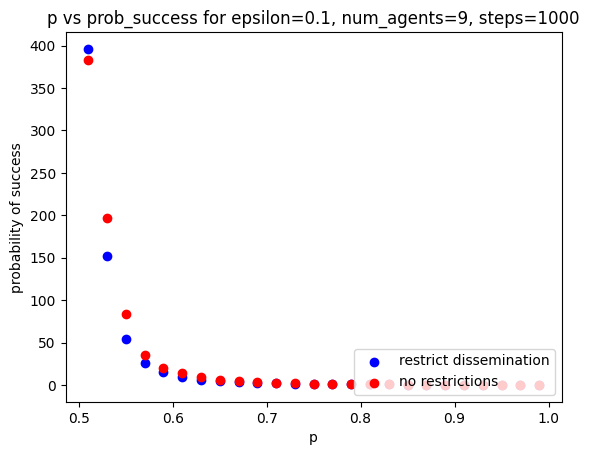

In [114]:
test_inc = pd.read_csv('bernoulli_simulations/output/epsilon1_n9_pRange_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['ps[1]'], dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(dyn_comp['ps[1]'], dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

plt.title('p vs prob_success for epsilon=0.1, num_agents=9, steps=1000')
plt.xlabel('p')
plt.ylabel('probability of success')
plt.legend(loc='lower right')
plt.show()

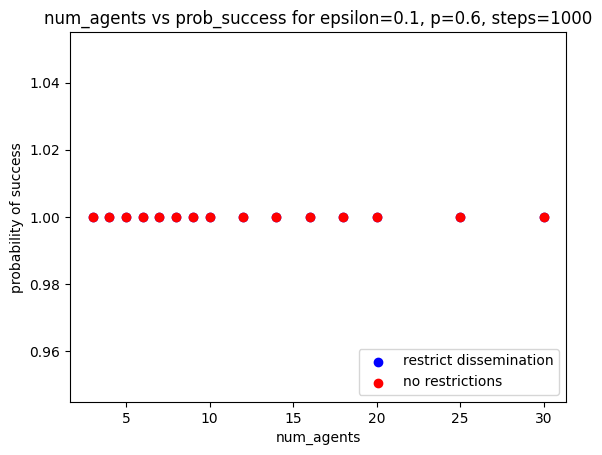

In [108]:
test_inc = pd.read_csv('bernoulli_simulations/output/epsilon1_nRange_p6_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['num_agents'], dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(dyn_comp['num_agents'], dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

plt.title('num_agents vs prob_success for epsilon=0.1, p=0.6, steps=1000')
plt.xlabel('num_agents')
plt.ylabel('probability of success')
plt.legend(loc='lower right')
plt.show()

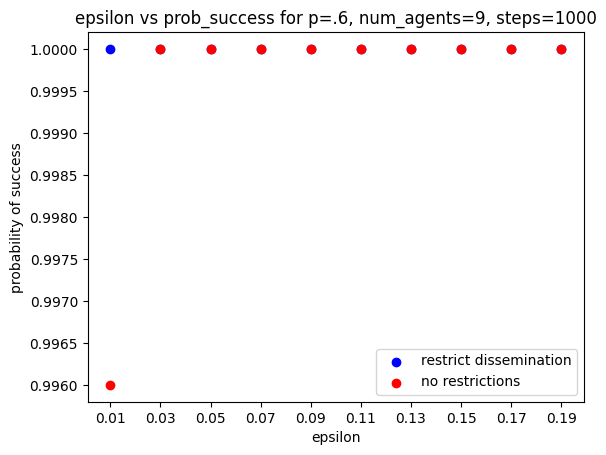

In [99]:
test_inc = pd.read_csv('bernoulli_simulations/output/epsilonRange_n9_p6_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(np.arange(.01, .2, .02), dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(np.arange(.01, .2, .02), dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

plt.title('epsilon vs prob_success for p=.6, num_agents=9, steps=1000')
plt.xlabel('epsilon')
plt.ylabel('probability of success')
plt.legend(loc='lower right')
plt.xticks(ticks=np.arange(.01, .2, .02))
plt.show()

## Time to converge scatter plots

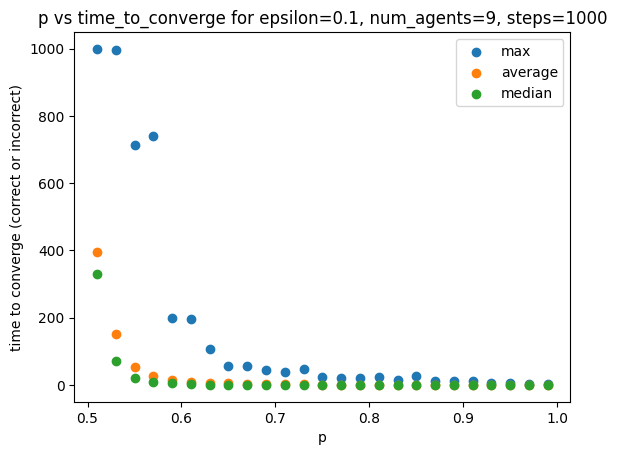

In [121]:
test_inc = pd.read_csv('bernoulli_simulations/output/epsilon1_n9_pRange_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['ps[1]'], dyn_diss['max_time_to_converge'], marker='o', label='max')
plt.scatter(dyn_diss['ps[1]'], dyn_diss['avg_time_to_converge'], marker='o', label='average')
plt.scatter(dyn_diss['ps[1]'], dyn_diss['median_time_to_converge'], marker='o', label='median')

plt.title('p vs time_to_converge for epsilon=0.1, num_agents=9, steps=1000')
plt.xlabel('p')
plt.ylabel('time to converge (correct or incorrect)')
plt.legend(loc='upper right')
plt.show()

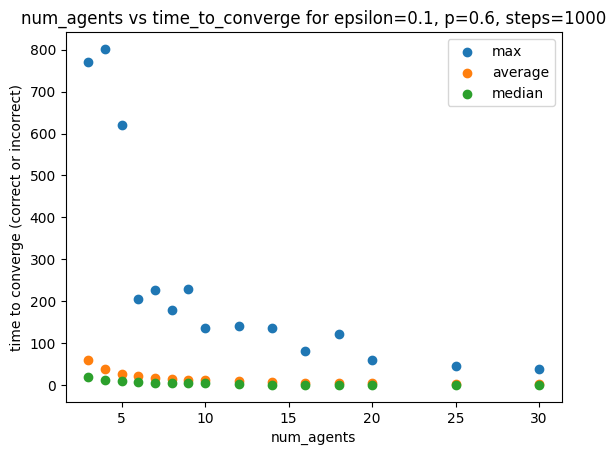

In [125]:
test_inc = pd.read_csv('bernoulli_simulations/output/epsilon1_nRange_p6_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['num_agents'], dyn_diss['max_time_to_converge'], marker='o', label='max')
plt.scatter(dyn_diss['num_agents'], dyn_diss['avg_time_to_converge'], marker='o', label='average')
plt.scatter(dyn_diss['num_agents'], dyn_diss['median_time_to_converge'], marker='o', label='median')

plt.title('num_agents vs time_to_converge for epsilon=0.1, p=0.6, steps=1000')
plt.xlabel('num_agents')
plt.ylabel('time to converge (correct or incorrect)')
plt.legend(loc='upper right')
plt.show()

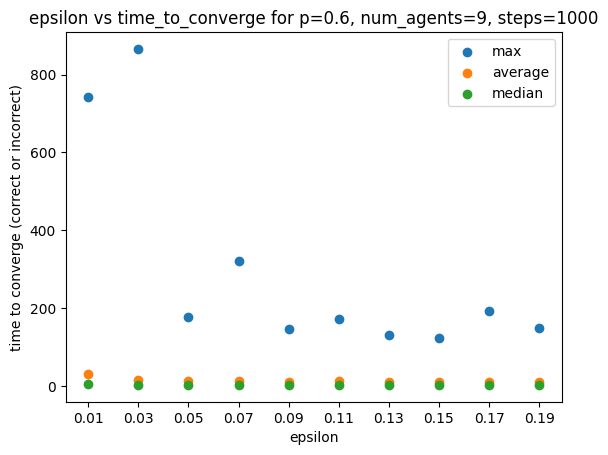

In [126]:
test_inc = pd.read_csv('bernoulli_simulations/output/epsilonRange_n9_p6_steps1000.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['epsilon'], dyn_diss['max_time_to_converge'], marker='o', label='max')
plt.scatter(dyn_diss['epsilon'], dyn_diss['avg_time_to_converge'], marker='o', label='average')
plt.scatter(dyn_diss['epsilon'], dyn_diss['median_time_to_converge'], marker='o', label='median')

plt.title('epsilon vs time_to_converge for p=0.6, num_agents=9, steps=1000')
plt.xlabel('epsilon')
plt.ylabel('time to converge (correct or incorrect)')
plt.legend(loc='upper right')
plt.xticks(ticks=np.arange(.01, .2, .02))
plt.show()

In [127]:
test_inc

scenario network_structure which_arm_restricted  ps[0]  \
0                 baseline          complete                  NaN    0.5   
1   restrict_dissemination              star               random    0.5   
2                 baseline          complete                  NaN    0.5   
3   restrict_dissemination              star               random    0.5   
4                 baseline          complete                  NaN    0.5   
5   restrict_dissemination              star               random    0.5   
6                 baseline          complete                  NaN    0.5   
7   restrict_dissemination              star               random    0.5   
8                 baseline          complete                  NaN    0.5   
9   restrict_dissemination              star               random    0.5   
10                baseline          complete                  NaN    0.5   
11  restrict_dissemination              star               random    0.5   
12                baseline          complete                  NaN    0.5   
13  restrict_dissemination              star               random    0.5   
14                baseline          complete                  NaN    0.5   
15  restrict_dissemination              star               random    0.5   
16                baseline          complete                  NaN    0.5   
17  restrict_dissemination              star               random    0.5   
18                baseline          complete                  NaN    0.5   
19  restrict_dissemination              star               random    0.5   

    ps[1]  num_agents  epsilon  n_steps  n_success  n_runs  \
0     0.6           9     0.01     1000        996    1000   
1     0.6           9     0.01     1000       1000    1000   
2     0.6           9     0.03     1000       1000    1000   
3     0.6           9     0.03     1000       1000    1000   
4     0.6           9     0.05     1000       1000    1000   
5     0.6           9     0.05     1000       1000    1000   
6     0.6           9     0.07     1000       1000    1000   
7     0.6           9     0.07     1000       1000    1000   
8     0.6           9     0.09     1000       1000    1000   
9     0.6           9     0.09     1000       1000    1000   
10    0.6           9     0.11     1000       1000    1000   
11    0.6           9     0.11     1000       1000    1000   
12    0.6           9     0.13     1000       1000    1000   
13    0.6           9     0.13     1000       1000    1000   
14    0.6           9     0.15     1000       1000    1000   
15    0.6           9     0.15     1000       1000    1000   
16    0.6           9     0.17     1000       1000    1000   
17    0.6           9     0.17     1000       1000    1000   
18    0.6           9     0.19     1000       1000    1000   
19    0.6           9     0.19     1000       1000    1000   

    avg_time_to_converge  min_time_to_converge  median_time_to_converge  \
0                 88.924                     0                      8.0   
1                 29.802                     0                      5.0   
2                 39.489                     0                      7.0   
3                 16.798                     0                      4.0   
4                 28.835                     0                      7.0   
5                 13.579                     0                      4.0   
6                 20.357                     0                      5.0   
7                 13.310                     0                      4.0   
8                 18.991                     0                      5.0   
9                 11.612                     0                      4.0   
10                16.875                     0                      5.0   
11                12.717                     0                      4.0   
12                14.724                     0                      4.0   
13                11.281                     0                      

## Ranging the Target max_ps value
Just update file path to view any results for ranging max_ps[1]

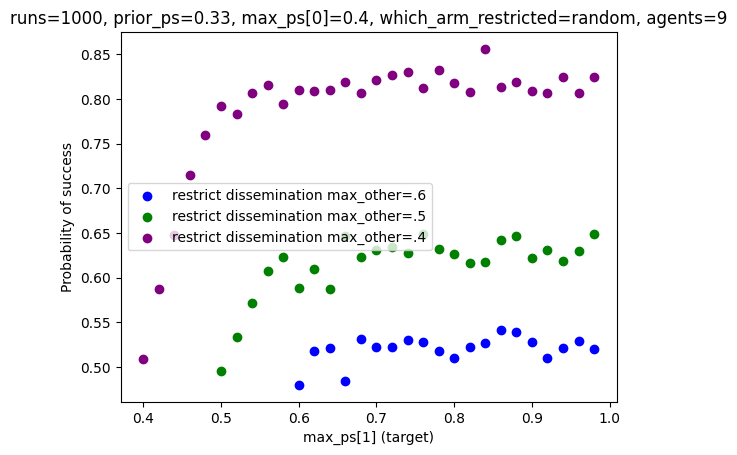

In [8]:
test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other6_targetRange.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['max_ps[1]'], dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination max_other=.6')
#plt.scatter(dyn_comp['max_ps[1]'], dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')

test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other5_targetRange.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['max_ps[1]'], dyn_diss['prob_success'], color='green', marker='o', label='restrict dissemination max_other=.5')
#plt.scatter(dyn_comp['max_ps[1]'], dyn_comp['prob_success'], color='red', alpha=0.5, marker='o', label='no restrictions 100 steps')


test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_bonus01_priors33_other4_targetRange.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[test_inc['scenario'] == 'restrict_dissemination']

plt.scatter(dyn_diss['max_ps[1]'], dyn_diss['prob_success'], color='purple', marker='o', label='restrict dissemination max_other=.4')
#plt.scatter(dyn_comp['max_ps[1]'], dyn_comp['prob_success'], color='red', alpha=0.5, marker='o', label='no restrictions')

plt.xlabel('max_ps[1] (target)')
plt.ylabel('Probability of success')
plt.legend()

runs = dyn_comp['n_runs'][0]
prior_ps = dyn_comp['prior_ps[0]'][0]
max_ps0 = dyn_comp['max_ps[0]'][0]
war = dyn_diss['arm_restricted'][1]

plt.title(f'runs={runs}, prior_ps={prior_ps}, max_ps[0]={max_ps0}, which_arm_restricted={war}, agents=9')
plt.show()

## Ranging both arms prior_ps values
Just update file path to view any results for ranging prior_ps

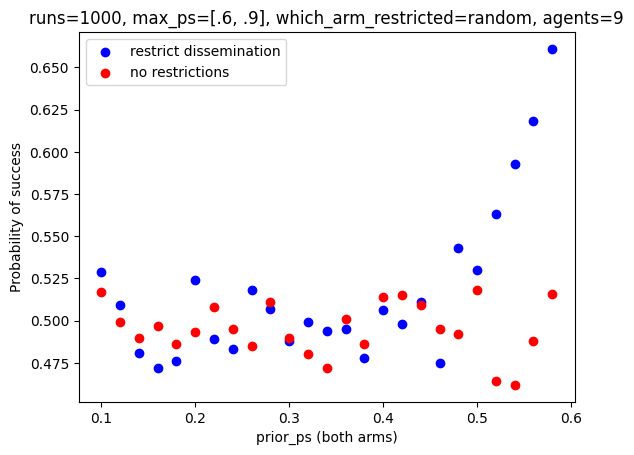

In [11]:
test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_priorsRange_other6_target9.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

dyn_comp = test_inc[test_inc['scenario'] == 'baseline'] 
dyn_diss = test_inc[(test_inc['scenario'] == 'restrict_dissemination') & (test_inc['arm_restricted'] == 'random')]

plt.scatter(dyn_diss['prior_ps[1]'], dyn_diss['prob_success'], color='blue', marker='o', label='restrict dissemination')
plt.scatter(dyn_comp['prior_ps[1]'], dyn_comp['prob_success'], color='red', marker='o', label='no restrictions')
plt.xlabel('prior_ps (both arms)')
plt.ylabel('Probability of success')
plt.legend()


runs = dyn_comp['n_runs'][0]
prior_ps = dyn_comp['prior_ps[0]'][0]
max_ps0 = dyn_comp['max_ps[0]'][0]

plt.title(f'runs={runs}, max_ps=[.6, .9], which_arm_restricted=random, agents=9')
plt.show()

## Testing/visualizing the effects of different p_increment values

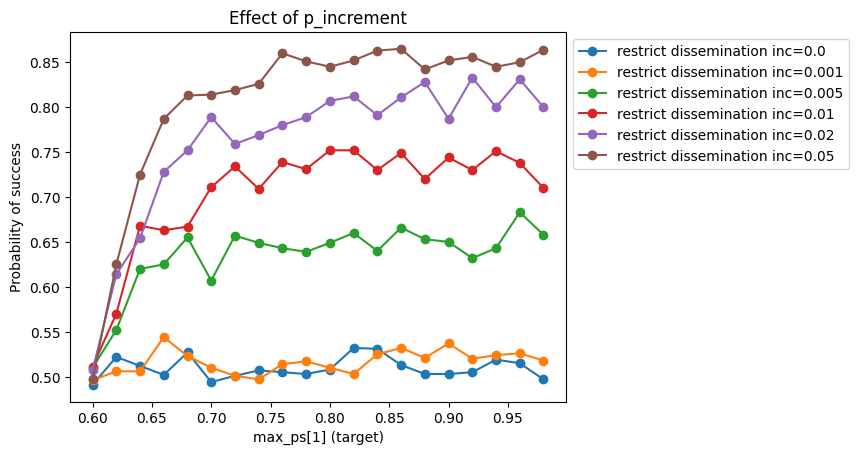

In [80]:
test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_bonusRange_priors5_other6_targetRange.csv')

b1df = pd.read_csv('bernoulli_simulations/output/dynamic_bonus02_priors5_other6_targetRange.csv')
b2df = pd.read_csv('bernoulli_simulations/output/dynamic_bonus05_priors5_other6_targetRange.csv')
b3df = pd.read_csv('bernoulli_simulations/output/dynamic_bonus005_priors5_other6_targetRange.csv')


test_inc = pd.concat([test_inc, b1df, b2df, b3df])

test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

for p_bonus in sorted(test_inc['p_increment[0]'].unique()):
    p_df = test_inc[test_inc['p_increment[0]'] == p_bonus]
    dyn_comp = p_df[p_df['scenario'] == 'baseline'] 
    dyn_diss = p_df[p_df['scenario'] == 'restrict_dissemination']

    plt.plot(dyn_diss['max_ps[1]'], dyn_diss['prob_success'], marker='o', label=f'restrict dissemination inc={p_bonus}')
    #plt.plot(dyn_comp['max_ps[1]'], dyn_comp['prob_success'], marker='o', label=f'no restrictions inc={p_bonus}')


plt.xlabel('max_ps[1] (target)')
plt.ylabel('Probability of success')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Effect of p_increment')
plt.show()

## Testing/visualizing the effects of restricting which arm

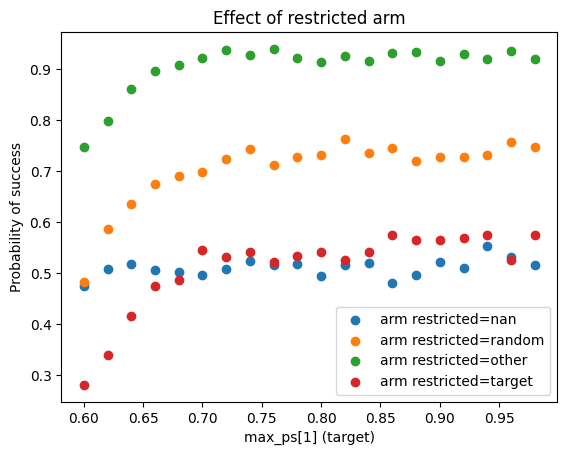

In [122]:
test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_armRange_bonus01_priors5_other6_targetRange.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

test_inc['arm_restricted'] = test_inc['arm_restricted'].astype(str)
for arm in test_inc['arm_restricted'].unique():
    arm_df = test_inc[test_inc['arm_restricted'] == arm]
    plt.scatter(arm_df['max_ps[1]'], arm_df['prob_success'], marker='o', label=f'arm restricted={arm}')

plt.xlabel('max_ps[1] (target)')
plt.ylabel('Probability of success')
plt.legend()
plt.title('Effect of restricted arm')
plt.show()

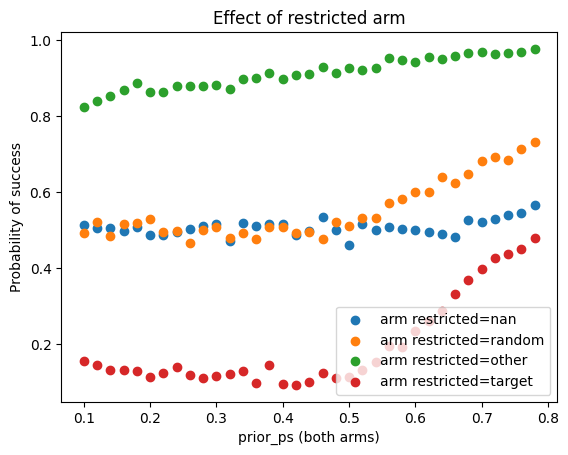

In [126]:
test_inc = pd.read_csv('bernoulli_simulations/output/dynamic_armRange_bonus01_priorsRange_other8_target95.csv')
test_inc['prob_success'] = test_inc['n_success'] / test_inc['n_runs']

test_inc['arm_restricted'] = test_inc['arm_restricted'].astype(str)
for arm in test_inc['arm_restricted'].unique():
    arm_df = test_inc[test_inc['arm_restricted'] == arm]
    plt.scatter(arm_df['prior_ps[0]'], arm_df['prob_success'], marker='o', label=f'arm restricted={arm}')

plt.xlabel('prior_ps (both arms)')
plt.ylabel('Probability of success')
plt.legend()
plt.title('Effect of restricted arm')
plt.show()

## Steps

In [78]:
steps_df = pd.read_csv('bernoulli_simulations/output/dynamic_steps_priors33_other6_target8_steps1000.csv')

C:\Users\skyec\AppData\Local\Temp\ipykernel_10280\2571173720.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  steps_df = pd.read_csv('bernoulli_simulations/output/dynamic_steps_priors33_other6_target8_steps1000.csv')


In [79]:
steps_df

scenario which_arm_restricted  num_agents  sim_id  \
0                     baseline                  NaN           9       0   
1                     baseline                  NaN           9       0   
2                     baseline                  NaN           9       0   
3                     baseline                  NaN           9       0   
4                     baseline                  NaN           9       0   
...                        ...                  ...         ...     ...   
179995  restrict_dissemination                other           9       9   
179996  restrict_dissemination                other           9       9   
179997  restrict_dissemination                other           9       9   
179998  restrict_dissemination                other           9       9   
179999  restrict_dissemination                other           9       9   

        step_id  agent_id  other_p_with_bonus  target_p_with_bonus  choice  
0             0         0                0.33                 0.33       0  
1             0         1                0.33                 0.33       0  
2             0         2                0.33                 0.33       0  
3             0         3                0.33                 0.33       0  
4             0         4                0.33                 0.33       0  
...         ...       ...                 ...                  ...     ...  
179995      999         4                0.38                 0.80       1  
179996      999         5                0.33                 0.80       1  
179997      999         6                0.33                 0.80       1  
179998      999         7                0.46                 0.80       1  
179999      999         8                0.34                 0.80       1  

[180000 rows x 9 columns]

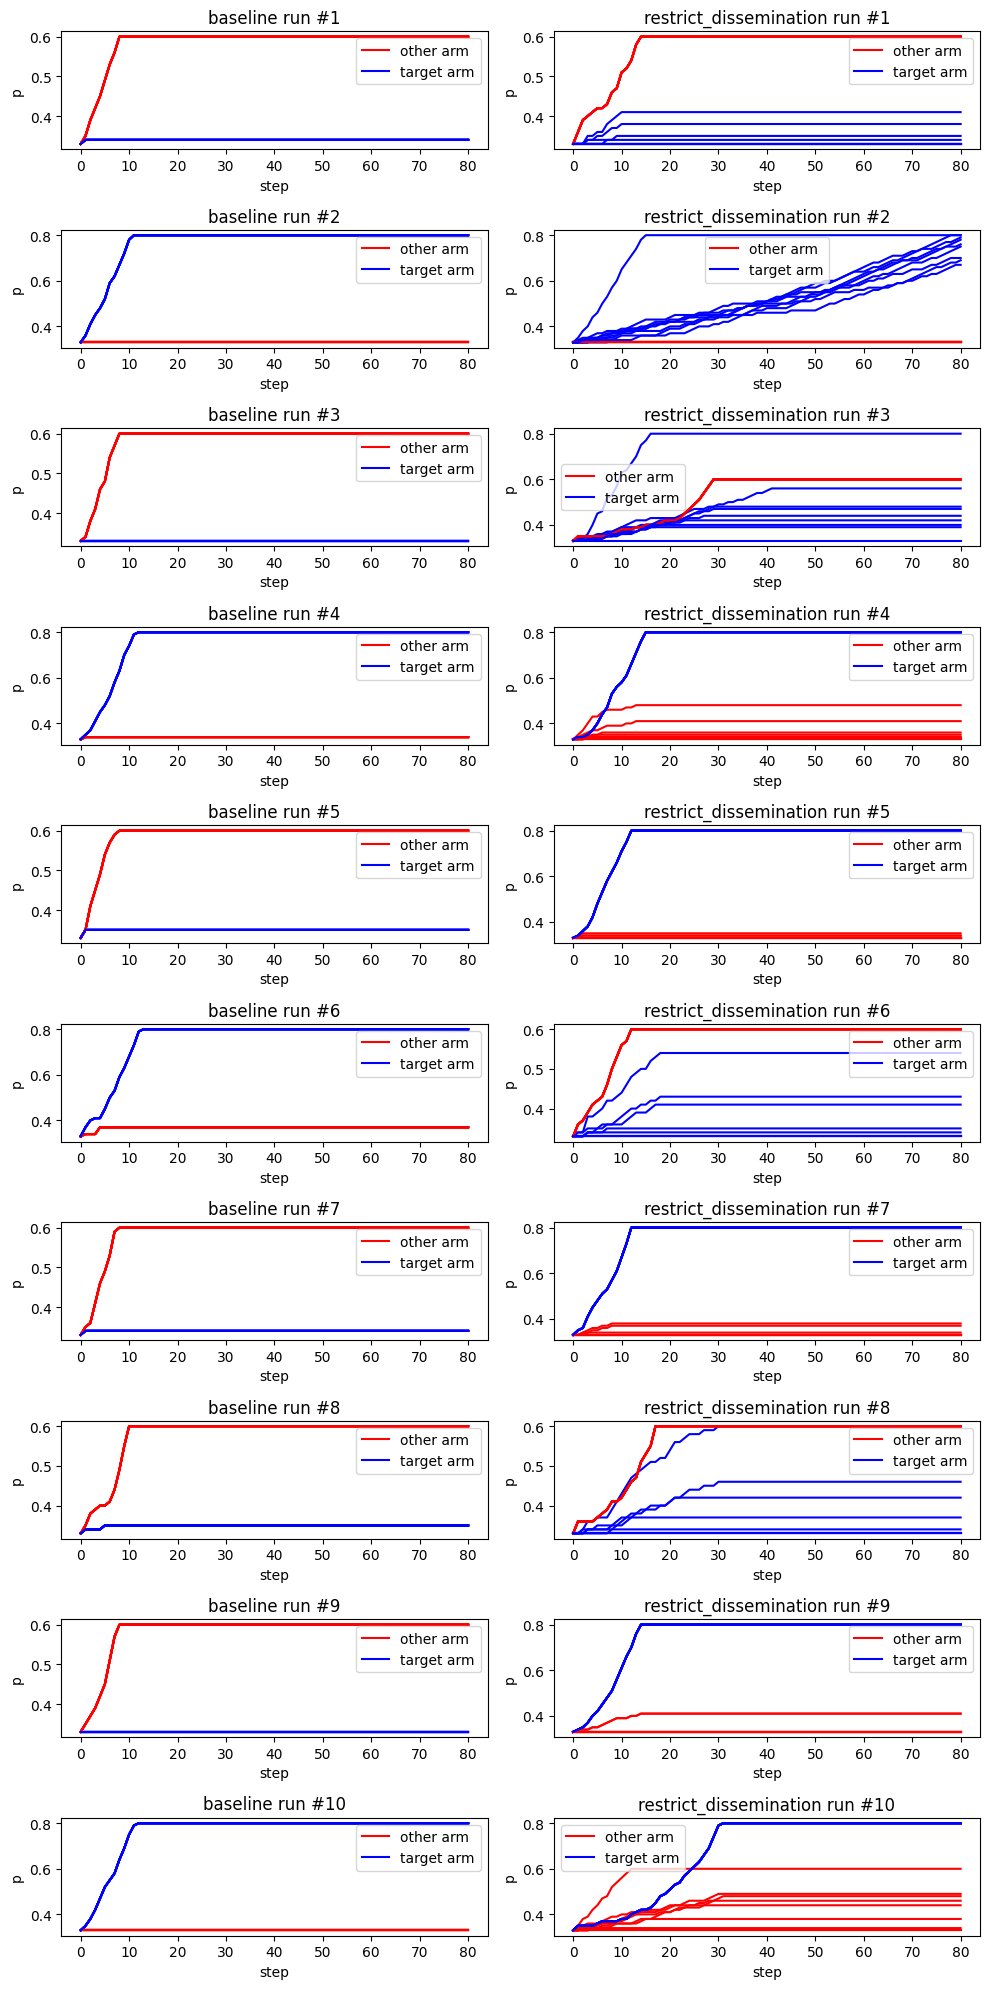

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Create a single large figure with a 10x2 grid of subplots
fig, axs = plt.subplots(10, 2, figsize=(10, 20))  # 10 rows, 2 columns

# Iterate through each sim_id
for sim_id in range(0, 11):
    sim_df = steps_df[(steps_df['sim_id'] == sim_id) & (steps_df['step_id'] <= 80)]
    
    # Calculate the row and column index for the current simulation
    row_index = sim_id  # 10 rows, so row_index ranges from 0 to 9
    col_index = 0           # Always 0 since we want 2 columns
    
    # Iterate through each scenario in the current simulation
    for scenario_index, scenario in enumerate(sim_df['scenario'].unique()):
        scenario_df = sim_df[sim_df['scenario'] == scenario]
        h = True
        for agent in scenario_df['agent_id'].unique():
            agent_df = scenario_df[scenario_df['agent_id'] == agent]
            if h:
                axs[row_index, col_index].plot(agent_df['step_id'], agent_df['other_p_with_bonus'], color='red', label='other arm')
                axs[row_index, col_index].plot(agent_df['step_id'], agent_df['target_p_with_bonus'], color='blue', label='target arm')
                h = False
            else:
                axs[row_index, col_index].plot(agent_df['step_id'], agent_df['other_p_with_bonus'], color='red')
                axs[row_index, col_index].plot(agent_df['step_id'], agent_df['target_p_with_bonus'], color='blue')

        axs[row_index, col_index].set_title(f'{scenario} run #{sim_id + 1}')
        axs[row_index, col_index].set_ylabel('p')
        axs[row_index, col_index].set_xlabel('step')
        axs[row_index, col_index].legend()
        col_index += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

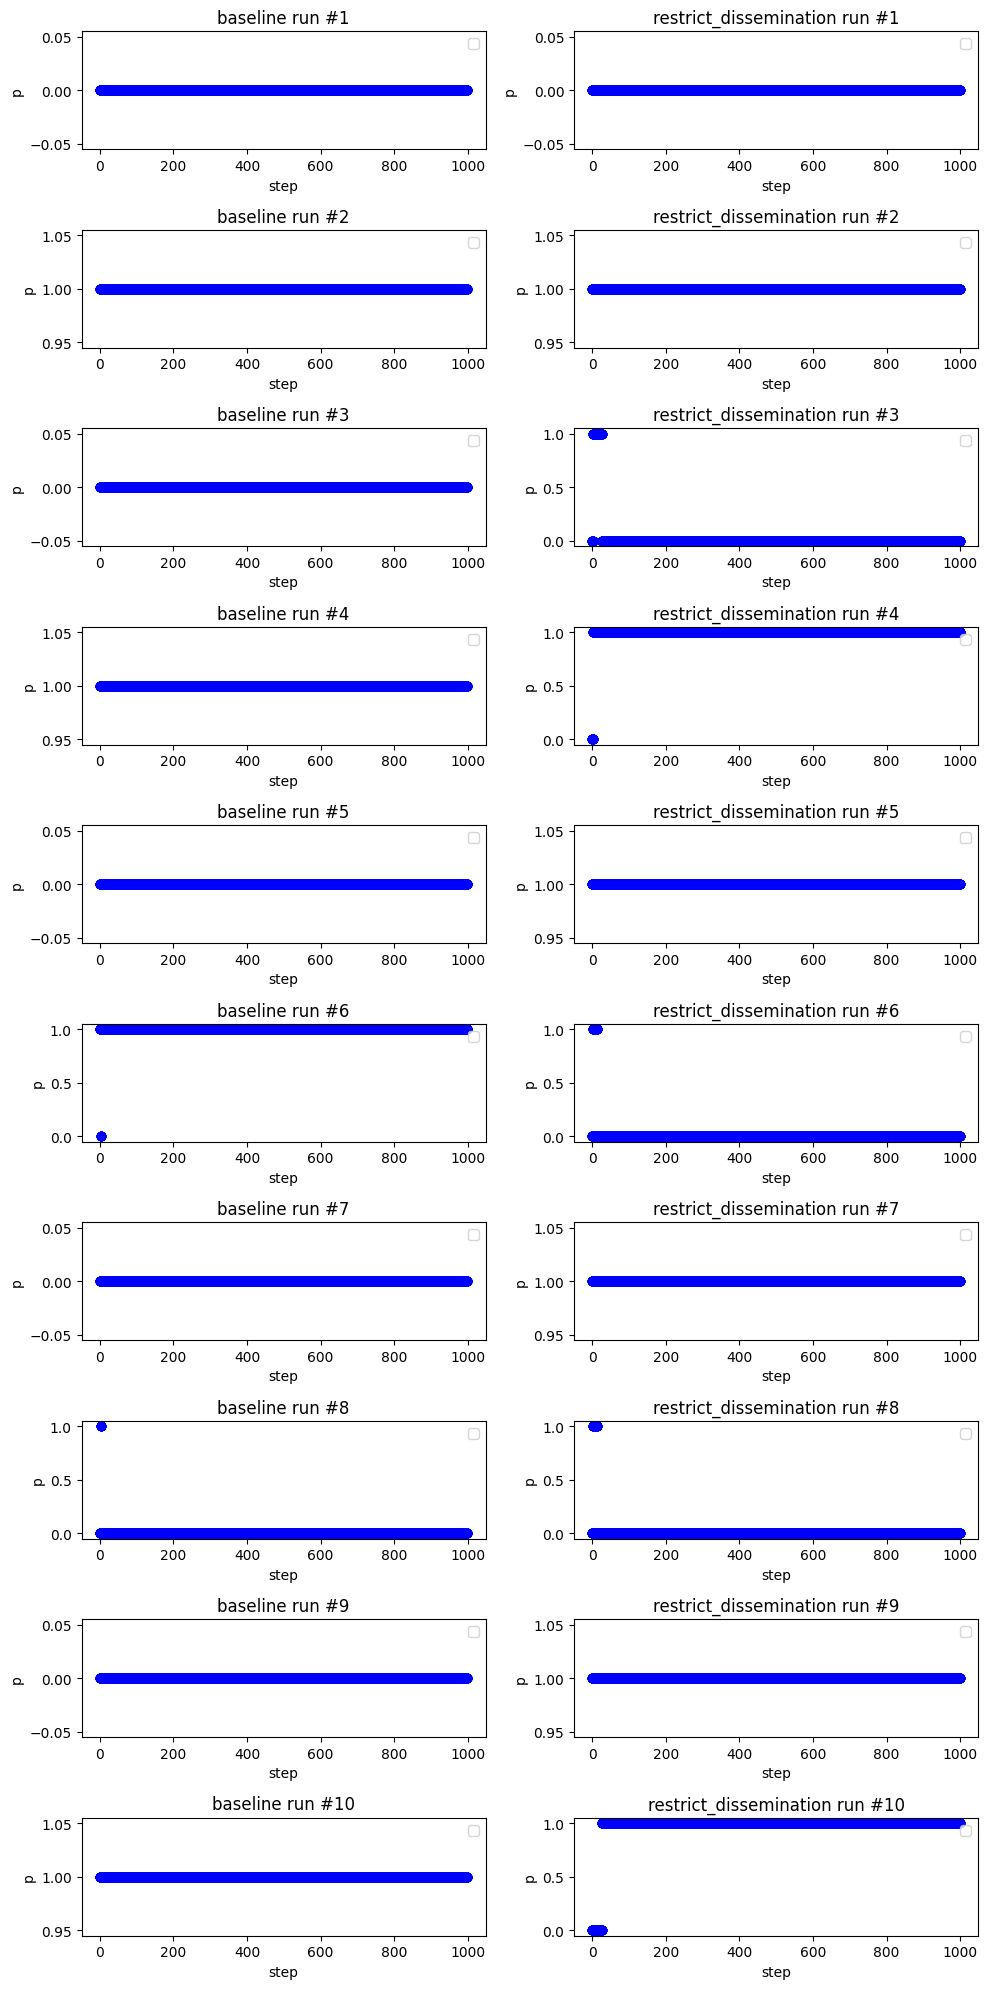

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Create a single large figure with a 10x2 grid of subplots
fig, axs = plt.subplots(10, 2, figsize=(10, 20))  # 10 rows, 2 columns

# Iterate through each sim_id
for sim_id in range(0, 11):
    sim_df = steps_df[(steps_df['sim_id'] == sim_id) & (steps_df['step_id'] <= 1000)]
    
    # Calculate the row and column index for the current simulation
    row_index = sim_id  # 10 rows, so row_index ranges from 0 to 9
    col_index = 0           # Always 0 since we want 2 columns
    
    # Iterate through each scenario in the current simulation
    for scenario_index, scenario in enumerate(sim_df['scenario'].unique()):
        scenario_df = sim_df[sim_df['scenario'] == scenario]
        
        axs[row_index, col_index].scatter(scenario_df['step_id'], scenario_df['choice'], color='blue')

        axs[row_index, col_index].set_title(f'{scenario} run #{sim_id + 1}')
        axs[row_index, col_index].set_ylabel('p')
        axs[row_index, col_index].set_xlabel('step')
        axs[row_index, col_index].legend()
        col_index += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


# **FALL 2024**

In [20]:
def plot_results(file_name, x_axis, y_axis, title="yuh"):
    file_path = 'bernoulli_simulations/output_fall2024/' + file_name

    df = pd.read_csv(file_path)

    baseline_df = df[df['scenario'] == 'baseline']
    restrict_dissemination_df = df[df['scenario'] == 'restrict_dissemination']

    plt.scatter(baseline_df[x_axis], baseline_df[y_axis], color='red', label='baseline')
    plt.scatter(restrict_dissemination_df[x_axis], restrict_dissemination_df[y_axis], color='blue', label='restrict dissemination')

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.title(title)
    
def generate_relevant_plots(df, x_axis_variable='p'):

    match x_axis_variable:
        case 'p':
        case 'n':
        case 'epsilon':
        case 'inertia':
            x_axis = 'ps[0]'

    baseline_df = df[df['scenario'] == 'baseline']
    restrict_dissemination_df = df[df['scenario'] == 'restrict_dissemination']

    # 

In [23]:
df = pd.read_csv('bernoulli_simulations/output_fall2024/changing_P_with_epsilon.csv')

In [24]:
df.columns

Index(['scenario', 'network_structure', 'which_arm_restricted', 'ps[0]',
       'ps[1]', 'num_agents', 'epsilon', 'n_steps', 'n_success', 'n_runs',
       'avg_total_succ_pulls', 'min_total_succ_pulls',
       'median_total_succ_pulls', 'max_total_succ_pulls',
       'stnd_dev_total_succ_pulls', 'avg_ca_time_to_converge',
       'min_ca_time_to_converge', 'median_ca_time_to_converge',
       'max_ca_time_to_converge', 'stnd_dev_ca_time_to_converge',
       'avg_group_time_to_converge', 'min_group_time_to_converge',
       'median_group_time_to_converge', 'max_group_time_to_converge',
       'stnd_dev_group_time_to_converge', 'times_group_converged',
       'avg_group_time_to_converge_succ', 'min_group_time_to_converge_succ',
       'median_group_time_to_converge_succ', 'max_group_time_to_converge_succ',
       'stnd_dev_group_time_to_converge_succ', 'times_group_converged_succ'],
      dtype='object')

In [86]:
test = pd.read_csv("bernoulli_simulations/output_fall2024/default_investigation.csv")

x_axis = 'ps[1]' # 'ps[1]'

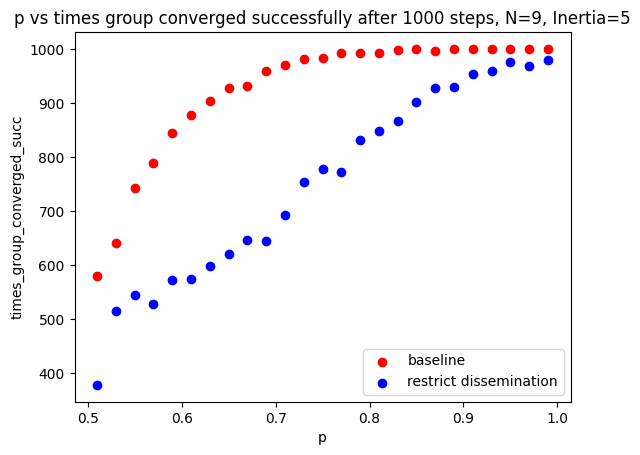

In [70]:
base = test[test['scenario'] == 'baseline']
diss = test[test['scenario'] == 'restrict_dissemination']

plt.scatter(base[x_axis], base['times_group_converged_succ'], color='red', label='baseline')
plt.scatter(diss[x_axis], diss['times_group_converged_succ'], color='blue', label='restrict dissemination')

plt.title('p vs times group converged successfully after 1000 steps, N=9')
plt.xlabel('p')
plt.ylabel('times_group_converged_succ')
plt.legend()

#plt.xticks(np.arange(.51, .7, .02))

plt.show()

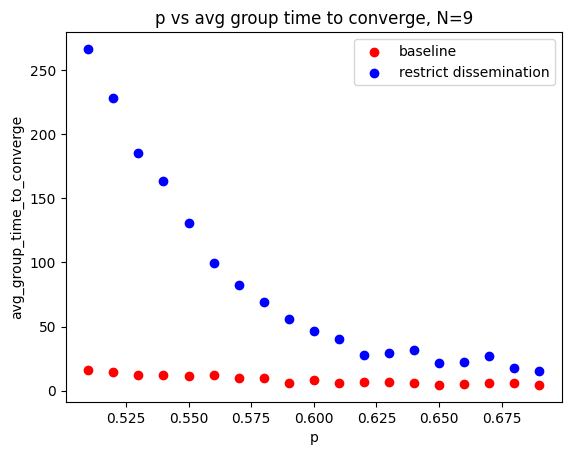

In [88]:
base = test[test['scenario'] == 'baseline']
diss = test[test['scenario'] == 'restrict_dissemination']

plt.scatter(base[x_axis], base['avg_group_time_to_converge'], color='red', label='baseline')
plt.scatter(diss[x_axis], diss['avg_group_time_to_converge'], color='blue', label='restrict dissemination')

plt.title('p vs avg group time to converge, N=9')
plt.xlabel('p')
plt.ylabel('avg_group_time_to_converge')
plt.legend()

plt.show()

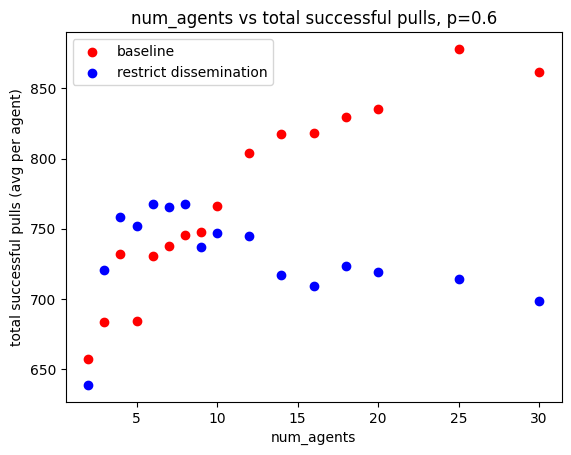

In [84]:
base = test[test['scenario'] == 'baseline']
diss = test[test['scenario'] == 'restrict_dissemination']

plt.scatter(base[x_axis], base['avg_total_succ_pulls'] / base[x_axis], color='red', label='baseline', marker='o')
plt.scatter(diss[x_axis], diss['avg_total_succ_pulls'] / diss[x_axis], color='blue', label='restrict dissemination')

plt.title('num_agents vs total successful pulls, p=0.6')
plt.xlabel('num_agents')
plt.ylabel('total successful pulls (avg per agent)')
plt.legend()

plt.show()

In [3]:
test = pd.read_csv("../test_1000.csv")

In [5]:
test

population size network type  epsilon value  binomial n  portion converged  \
0               10     complete          0.005        1000               0.95   
1               10        cycle          0.005        1000               0.98   
2               10     complete          0.010        1000               0.98   
3               10        cycle          0.010        1000               0.99   
4               20     complete          0.005        1000               0.98   
5               20        cycle          0.005        1000               1.00   
6               20     complete          0.010        1000               1.00   
7               20        cycle          0.010        1000               1.00   

   average round converged  standard deviation  
0                 5.568421            2.804705  
1                34.295918           17.812063  
2                 2.122449            0.906499  
3                 8.838384            4.502989  
4                 3.867347            1.877024  
5                45.470000           20.422759  
6                 1.540000            0.498397  
7                11.420000            4.911578

In [13]:
np.random.binomial(10, .6)

8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

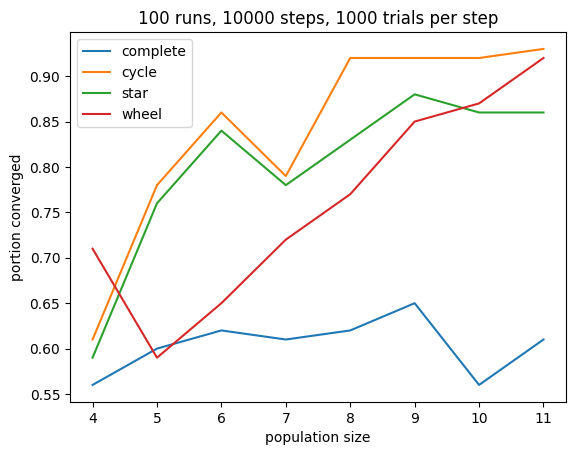

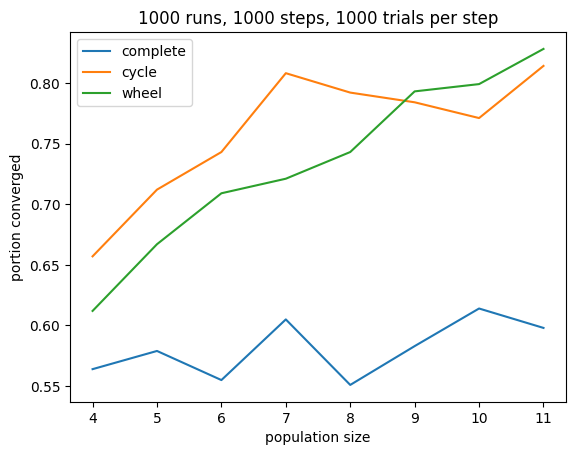

In [17]:
test = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_setup_test.csv")
#test.head()

for network_structure in test["network_structure"].unique():
    network_df = test[test['network_structure'] == network_structure]
    plt.plot(network_df['num_agents'], network_df['proportion_converged'], label=network_structure)

plt.legend()
plt.xlabel('population size')
plt.ylabel('portion converged')
plt.title("100 runs, 10000 steps, 1000 trials per step")
plt.show()


test = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_setup.csv")
#test.head()

for network_structure in test["network_structure"].unique():
    network_df = test[test['network_structure'] == network_structure]
    plt.plot(network_df['num_agents'], network_df['proportion_converged'], label=network_structure)

plt.legend()
plt.xlabel('population size')
plt.ylabel('portion converged')
plt.title("1000 runs, 1000 steps, 1000 trials per step")
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
p_df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_p_adv2.csv")

In [54]:
p_df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_p_miniPulls.csv")

In [55]:
p_df

network_structure  ps[0]   ps[1]  num_agents  default  n_steps  n_runs  \
0            complete    0.5  0.5001          10      NaN       10     500   
1            complete    0.5  0.5001          10      NaN       20     500   
2            complete    0.5  0.5001          10      NaN       30     500   
3            complete    0.5  0.5001          10      NaN       40     500   
4            complete    0.5  0.5001          10      NaN       50     500   
..                ...    ...     ...         ...      ...      ...     ...   
595             wheel    0.5  0.6000          10      NaN      460     500   
596             wheel    0.5  0.6000          10      NaN      470     500   
597             wheel    0.5  0.6000          10      NaN      480     500   
598             wheel    0.5  0.6000          10      NaN      490     500   
599             wheel    0.5  0.6000          10      NaN      500     500   

     success_convergence_rate  individuals_converged  total_successful_pulls  
0                       0.478                   4.78               50004.332  
1                       0.480                   4.80              100009.012  
2                       0.488                   4.88              150013.502  
3                       0.486                   4.86              200025.978  
4                       0.480                   4.80              250025.854  
..                        ...                    ...                     ...  
595                     1.000                  10.00             2759461.254  
596                     1.000                  10.00             2819474.966  
597                     1.000                  10.00             2879467.152  
598                     1.000                  10.00             2939460.150  
599                     1.000                  10.00             2999455.598  

[600 rows x 10 columns]

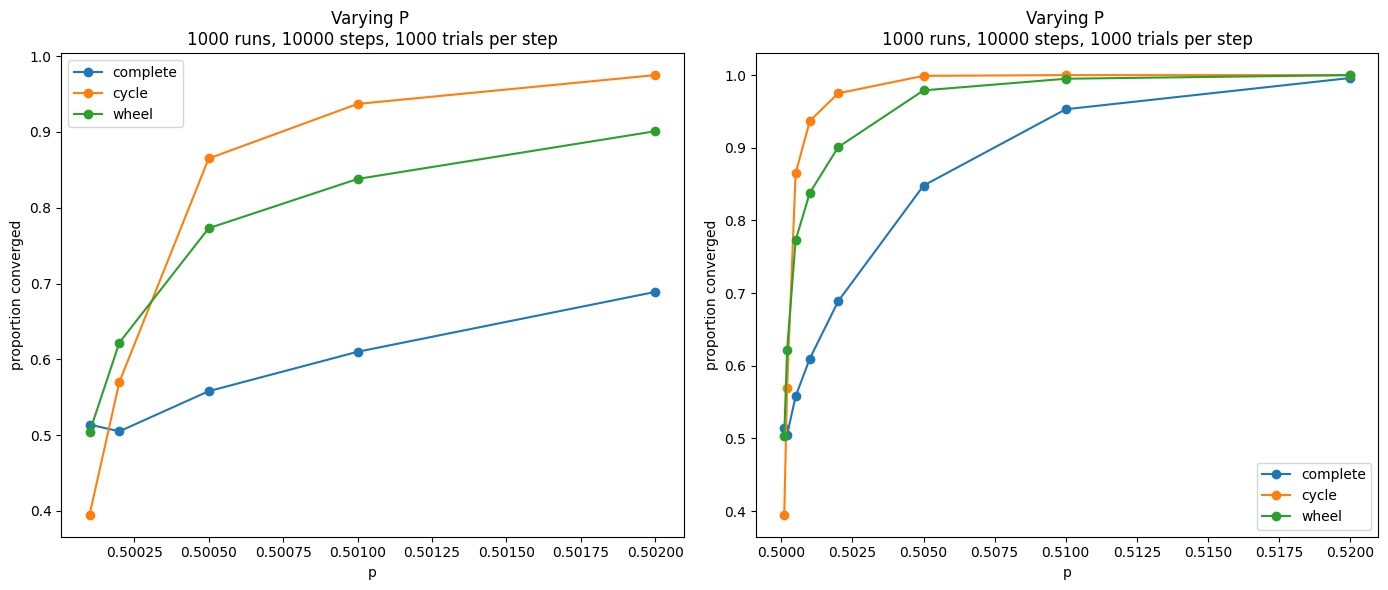

In [20]:
cutoffs = [0.502, 0.52]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for ax, cutoff in zip(axs, cutoffs):
    for ns in p_df['network_structure'].unique():
        ns_df = p_df[p_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['ps[1]'] <= cutoff]
        ns_df = ns_df[ns_df['n_steps'] == 10000]

        ax.plot(ns_df['ps[1]'], ns_df['success_convergence_rate'], label=ns, marker='o')
    
    ax.legend()
    ax.set_xlabel('p')
    ax.set_ylabel('proportion converged')
    ax.set_title(f'Varying P \n1000 runs, 10000 steps, 1000 trials per step')

plt.tight_layout()
plt.show()

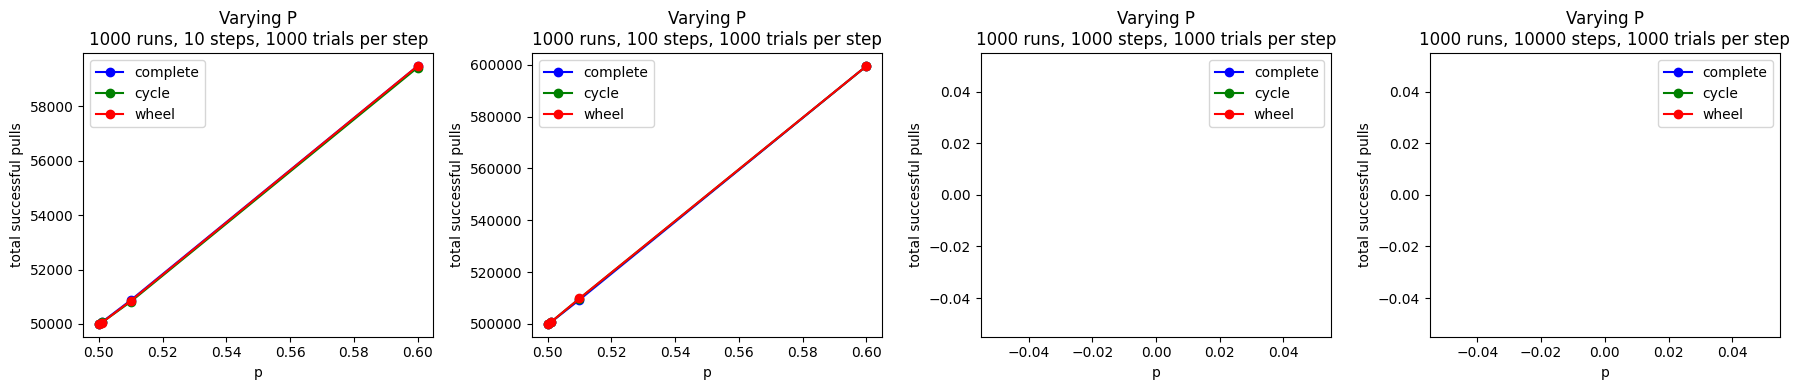

In [56]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, steps in enumerate([10, 100, 1000, 10000]):

    for ns in p_df['network_structure'].unique():
        c = 'red' if ns == 'wheel' else 'blue' if ns == 'complete' else 'green'

        ns_df = p_df[p_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] == steps]
        #ns_df = ns_df[ns_df['ps[1]'] <= .53]

        axs[idx].plot(ns_df['ps[1]'], ns_df['total_successful_pulls'], label=ns, color=c, marker='o')

    axs[idx].set_xlabel('p')
    axs[idx].set_ylabel('total successful pulls')
    axs[idx].set_title(f'Varying P\n1000 runs, {steps} steps, 1000 trials per step')
    axs[idx].legend()

plt.tight_layout()
plt.show()

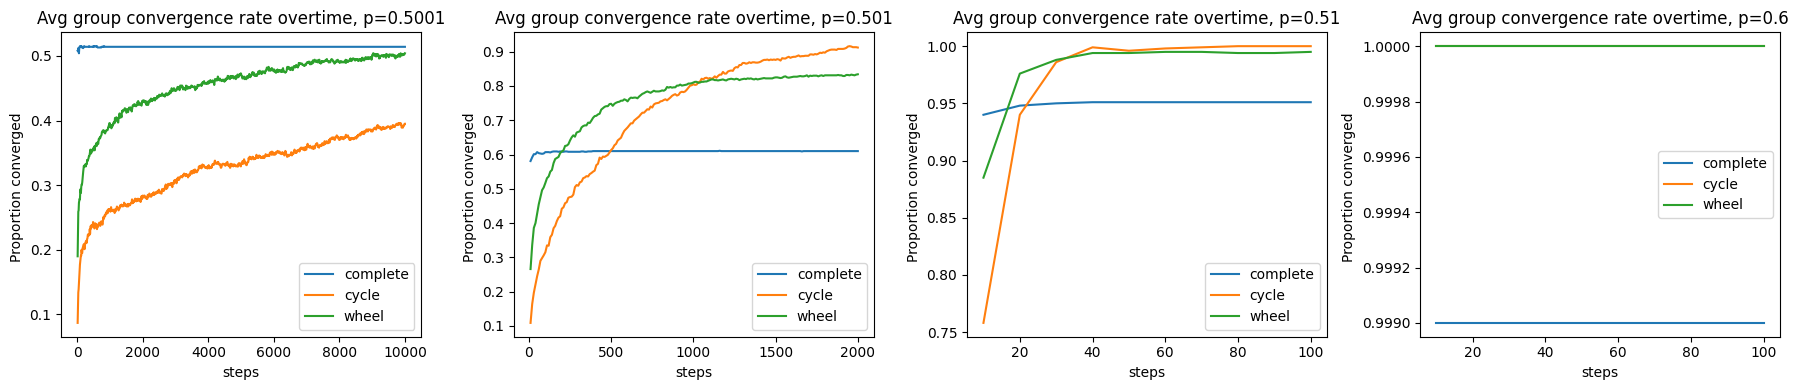

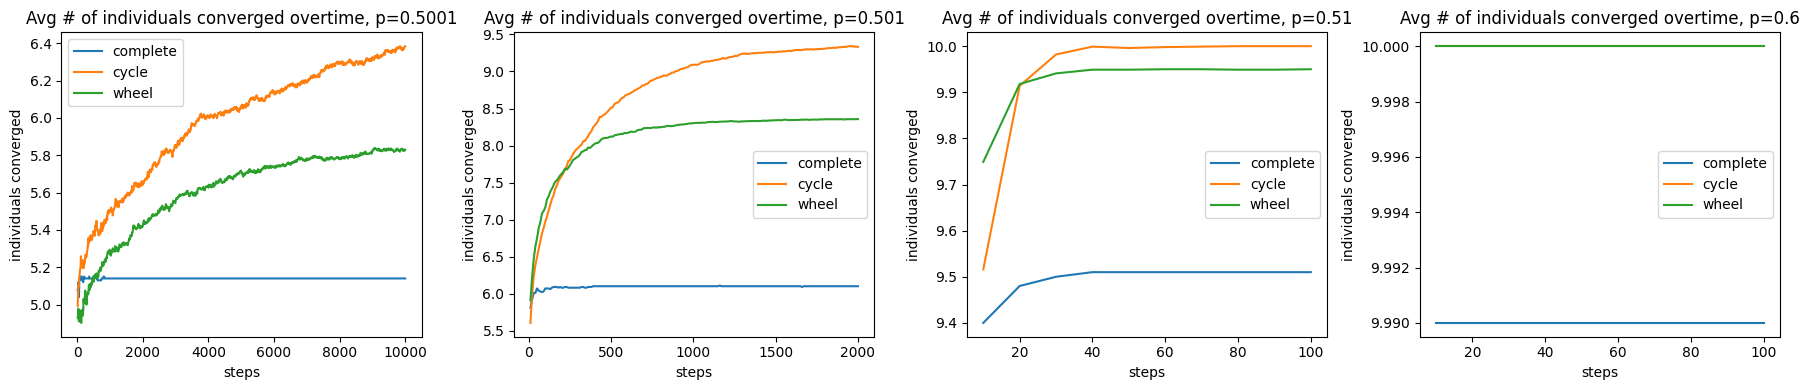

In [30]:
#p_vals = p_df['ps[1]'].unique()[:4]
p_vals = [.5001, .501, .51, .6]


fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, p in enumerate(p_vals):

    max_step = [10000, 2000, 100, 100][idx]

    pi_df = p_df[p_df['ps[1]'] == p]

    for ns in pi_df['network_structure'].unique():

        ns_df = pi_df[pi_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] <= max_step]

        axs[idx].plot(ns_df['n_steps'], ns_df['success_convergence_rate'], label=f'{ns}')

    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('Proportion converged ')
    axs[idx].set_title(f'Avg group convergence rate overtime, p={p}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, p in enumerate(p_vals):

    max_step = [10000, 2000, 100, 100][idx]

    pi_df = p_df[p_df['ps[1]'] == p]

    for ns in pi_df['network_structure'].unique():

        ns_df = pi_df[pi_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] <= max_step]

        axs[idx].plot(ns_df['n_steps'], ns_df['individuals_converged'], label=f'{ns}')

    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('individuals converged')
    axs[idx].set_title(f'Avg # of individuals converged overtime, p={p}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [85]:
p_df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_eps_Pulls.csv")

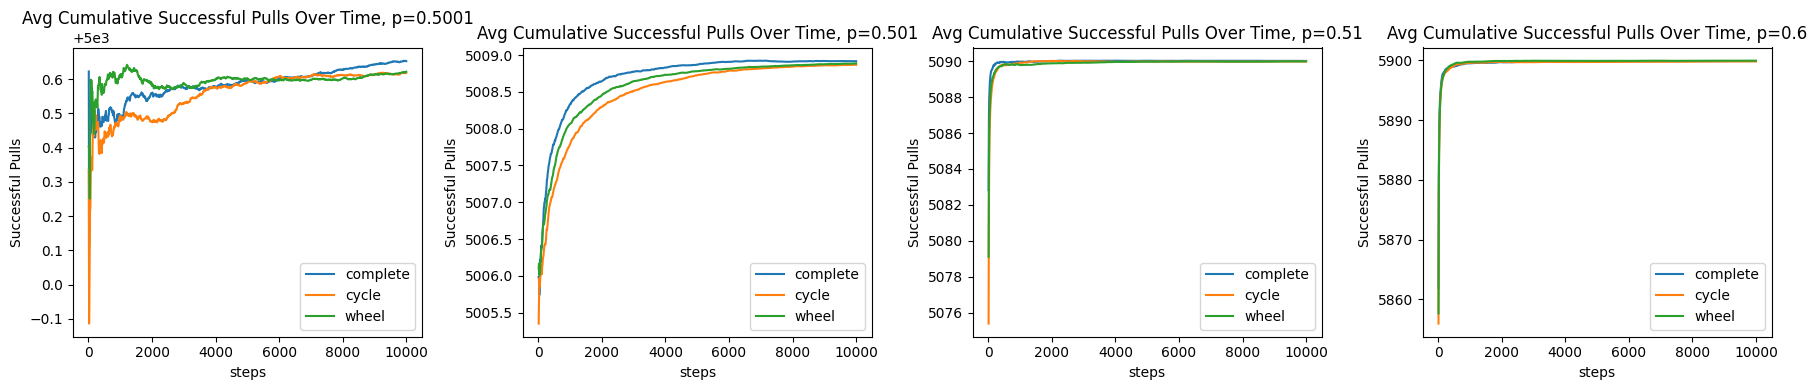

In [86]:
p_vals = [.5001, .501, .51, .6]


fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, p in enumerate(p_vals):

    max_step = [10000, 10000, 10000, 10000][idx]

    pi_df = p_df[p_df['ps[1]'] == p]

    for ns in pi_df['network_structure'].unique():

        ns_df = pi_df[pi_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] <= max_step]

        axs[idx].plot(ns_df['n_steps'], ns_df['total_successful_pulls'] / ns_df['n_steps'], label=f'{ns}')

    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('Successful Pulls')
    axs[idx].set_title(f'Avg Cumulative Successful Pulls Over Time, p={p}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [87]:
p_df

network_structure  ps[0]   ps[1]  num_agents  epsilon  n_steps  n_runs  \
0              complete    0.5  0.5001          10      0.1       10    1000   
1              complete    0.5  0.5001          10      0.1       20    1000   
2              complete    0.5  0.5001          10      0.1       30    1000   
3              complete    0.5  0.5001          10      0.1       40    1000   
4              complete    0.5  0.5001          10      0.1       50    1000   
...                 ...    ...     ...         ...      ...      ...     ...   
11995             wheel    0.5  0.6000          10      0.1     9960    1000   
11996             wheel    0.5  0.6000          10      0.1     9970    1000   
11997             wheel    0.5  0.6000          10      0.1     9980    1000   
11998             wheel    0.5  0.6000          10      0.1     9990    1000   
11999             wheel    0.5  0.6000          10      0.1    10000    1000   

       success_convergence_rate  individuals_converged  total_successful_pulls  
0                         0.536                   5.36            5.000622e+04  
1                         0.529                   5.29            1.000022e+05  
2                         0.533                   5.33            1.500106e+05  
3                         0.524                   5.24            2.000134e+05  
4                         0.516                   5.16            2.500233e+05  
...                         ...                    ...                     ...  
11995                     1.000                  10.00            5.876362e+07  
11996                     1.000                  10.00            5.882261e+07  
11997                     1.000                  10.00            5.888161e+07  
11998                     1.000                  10.00            5.894063e+07  
11999                     1.000                  10.00            5.899963e+07  

[12000 rows x 10 columns]

In [88]:
# difference in pulls
pulls_df = pd.DataFrame()

pulls_df['p'] = p_df[p_df['network_structure'] == 'complete']['ps[1]'].reset_index(drop=True)
pulls_df['n_steps'] = p_df[p_df['network_structure'] == 'complete']['n_steps'].reset_index(drop=True)

for ns in p_df['network_structure'].unique():
    ns_df = p_df[p_df['network_structure'] == ns].reset_index(drop=True)
    pulls_df[f'{ns} pulls'] = ns_df['total_successful_pulls']

pulls_df['min'] = pulls_df[['complete pulls', 'wheel pulls', 'cycle pulls']].min(axis=1)

for ns in p_df['network_structure'].unique():
    pulls_df[f'{ns} diff'] = pulls_df[f'{ns} pulls'] - pulls_df['min']

pulls_df


p  n_steps  complete pulls   cycle pulls   wheel pulls  \
0     0.5001       10    5.000622e+04  5.000336e+04  5.000403e+04   
1     0.5001       20    1.000022e+05  9.999773e+04  1.000081e+05   
2     0.5001       30    1.500106e+05  1.500001e+05  1.500112e+05   
3     0.5001       40    2.000134e+05  2.000055e+05  2.000100e+05   
4     0.5001       50    2.500233e+05  2.500107e+05  2.500236e+05   
...      ...      ...             ...           ...           ...   
3995  0.6000     9960    5.876299e+07  5.876247e+07  5.876362e+07   
3996  0.6000     9970    5.882199e+07  5.882146e+07  5.882261e+07   
3997  0.6000     9980    5.888098e+07  5.888046e+07  5.888161e+07   
3998  0.6000     9990    5.893997e+07  5.893944e+07  5.894063e+07   
3999  0.6000    10000    5.899898e+07  5.899843e+07  5.899963e+07   

               min  complete diff  cycle diff  wheel diff  
0     5.000336e+04          2.865         0.0       0.674  
1     9.999773e+04          4.489         0.0      10.361  
2     1.500001e+05         10.557         0.0      11.129  
3     2.000055e+05          7.899         0.0       4.528  
4     2.500107e+05         12.577         0.0      12.840  
...            ...            ...         ...         ...  
3995  5.876247e+07        513.489         0.0    1142.775  
3996  5.882146e+07        522.584         0.0    1149.921  
3997  5.888046e+07        529.231         0.0    1158.532  
3998  5.893944e+07        523.989         0.0    1189.813  
3999  5.899843e+07        541.156         0.0    1198.301  

[4000 rows x 9 columns]

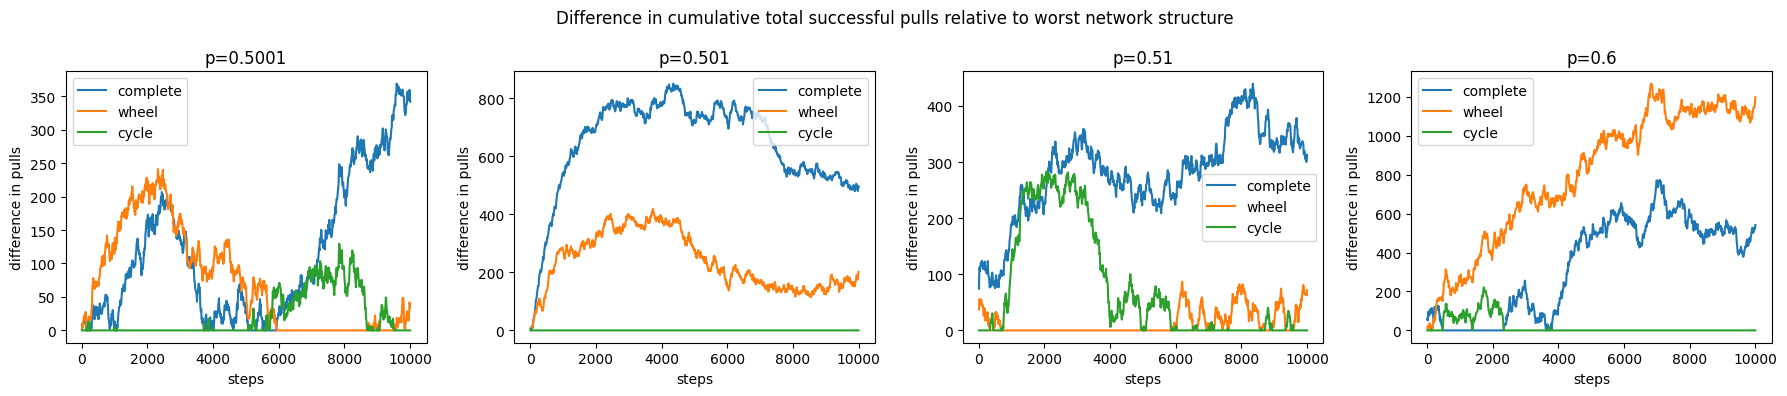

In [89]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, p in enumerate(pulls_df['p'].unique()[:4]):
    p_df = pulls_df[pulls_df['p'] == p]
    axs[idx].plot(p_df['n_steps'], p_df['complete diff'], label='complete')
    axs[idx].plot(p_df['n_steps'], p_df['wheel diff'], label='wheel')
    axs[idx].plot(p_df['n_steps'], p_df['cycle diff'], label='cycle')
    axs[idx].set_title(f'p={p}')
    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('difference in pulls')
    axs[idx].legend()

fig.suptitle('Difference in cumulative total successful pulls relative to worst network structure')
plt.tight_layout()
plt.show()

#for diff in ['complete diff', 'wheel diff', 'cycle diff']:
    #plt.plot(ns_df['ps[1]'], ns_df['total_successful_pulls'], label=ns)

P Values: [0.5001, 0.5005, 0.501, 0.502, 0.505, 0.51, 0.52, 0.55, 0.6]

In [19]:
eps_df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_epsilon.csv")

eps_df['proportion_converged'] /= 1000
eps_df

network_structure  ps[0]  ps[1]  num_agents  epsilon  n_steps  n_runs  \
0            complete    0.5  0.501           9   0.0001       10    1000   
1            complete    0.5  0.501           9   0.0001      100    1000   
2            complete    0.5  0.501           9   0.0001     1000    1000   
3            complete    0.5  0.501           9   0.0001    10000    1000   
4            complete    0.5  0.501           9   0.0005       10    1000   
..                ...    ...    ...         ...      ...      ...     ...   
103             wheel    0.5  0.501           9   0.0500    10000    1000   
104             wheel    0.5  0.501           9   0.1000       10    1000   
105             wheel    0.5  0.501           9   0.1000      100    1000   
106             wheel    0.5  0.501           9   0.1000     1000    1000   
107             wheel    0.5  0.501           9   0.1000    10000    1000   

     proportion_converged  
0                   0.559  
1                   0.577  
2                   0.593  
3                   0.000  
4                   0.554  
..                    ...  
103                 0.000  
104                 0.210  
105                 0.410  
106                 0.894  
107                 0.000  

[108 rows x 8 columns]

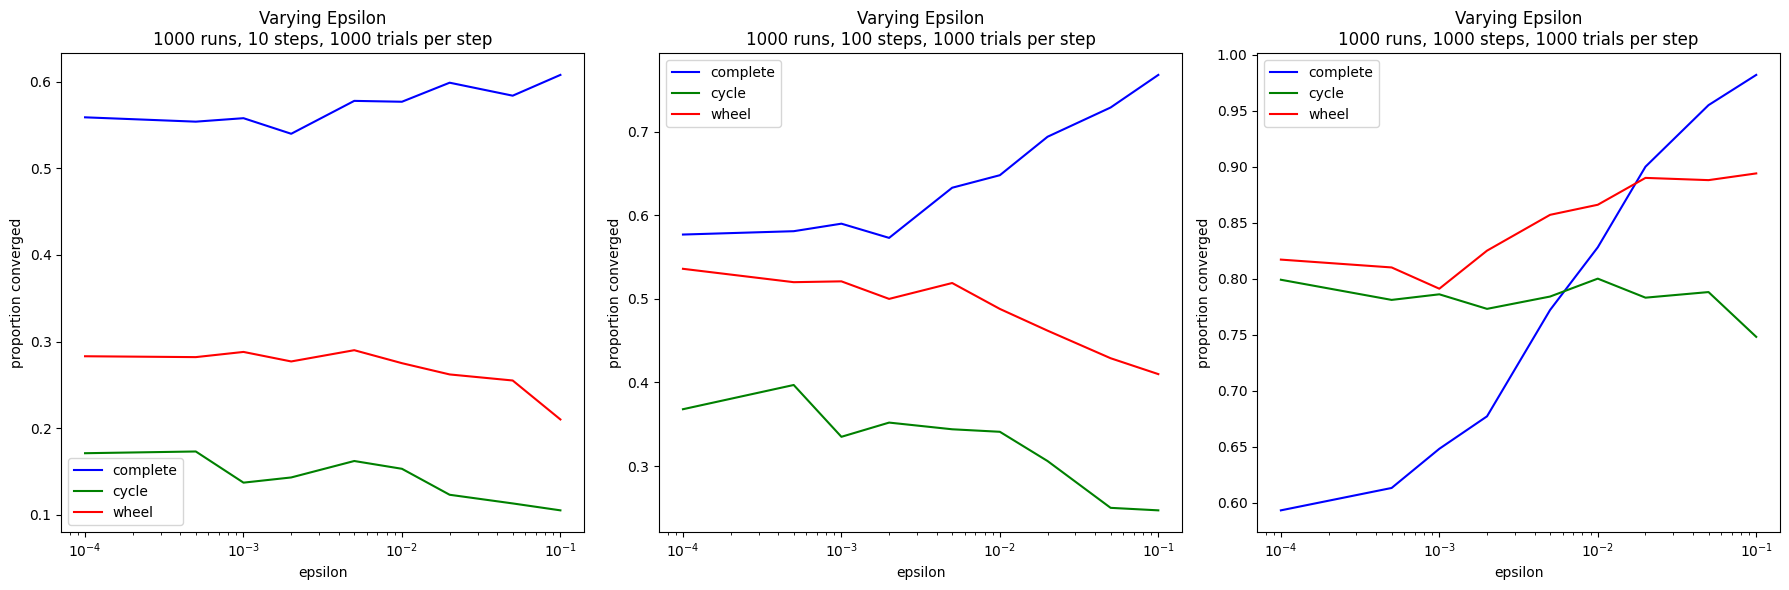

In [37]:
#steps = 10

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for idx, steps in enumerate([10, 100, 1000]):

    for ns in eps_df['network_structure'].unique():
        c = 'red' if ns == 'wheel' else 'blue' if ns == 'complete' else 'green'

        ns_df = eps_df[eps_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] == steps]

        axs[idx].plot(ns_df['epsilon'], ns_df['proportion_converged'], label=ns, color=c)

    axs[idx].set_xlabel('epsilon')
    axs[idx].set_xscale('log')
    axs[idx].set_ylabel('proportion converged')
    axs[idx].set_title(f'Varying Epsilon\n1000 runs, {steps} steps, 1000 trials per step')
    axs[idx].legend()

plt.tight_layout()
plt.show()

Epsilon Values: [.0001, .0005, .001, .002, .005, .01, .02, .05, .1]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
p_eps_df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_epsilon_adv_smallp2.csv")

In [5]:
p_eps_df

network_structure  ps[0]  ps[1]  num_agents  epsilon  n_steps  n_runs  \
0              complete    0.5  0.501          10      0.1       10    1000   
1              complete    0.5  0.501          10      0.1       20    1000   
2              complete    0.5  0.501          10      0.1       30    1000   
3              complete    0.5  0.501          10      0.1       40    1000   
4              complete    0.5  0.501          10      0.1       50    1000   
...                 ...    ...    ...         ...      ...      ...     ...   
71995             wheel    0.5  0.616          10      0.1     9960    1000   
71996             wheel    0.5  0.616          10      0.1     9970    1000   
71997             wheel    0.5  0.616          10      0.1     9980    1000   
71998             wheel    0.5  0.616          10      0.1     9990    1000   
71999             wheel    0.5  0.616          10      0.1    10000    1000   

       success_convergence_rate  individuals_converged  total_successful_pulls  
0                         0.624                   6.24            2.794382e+05  
1                         0.654                   6.54            5.833906e+05  
2                         0.672                   6.72            8.966187e+05  
3                         0.701                   7.01            1.221864e+06  
4                         0.729                   7.29            1.557391e+06  
...                         ...                    ...                     ...  
71995                     1.000                  10.00            2.539941e+08  
71996                     1.000                  10.00            2.542490e+08  
71997                     1.000                  10.00            2.545041e+08  
71998                     1.000                  10.00            2.547592e+08  
71999                     1.000                  10.00            2.550137e+08  

[72000 rows x 10 columns]

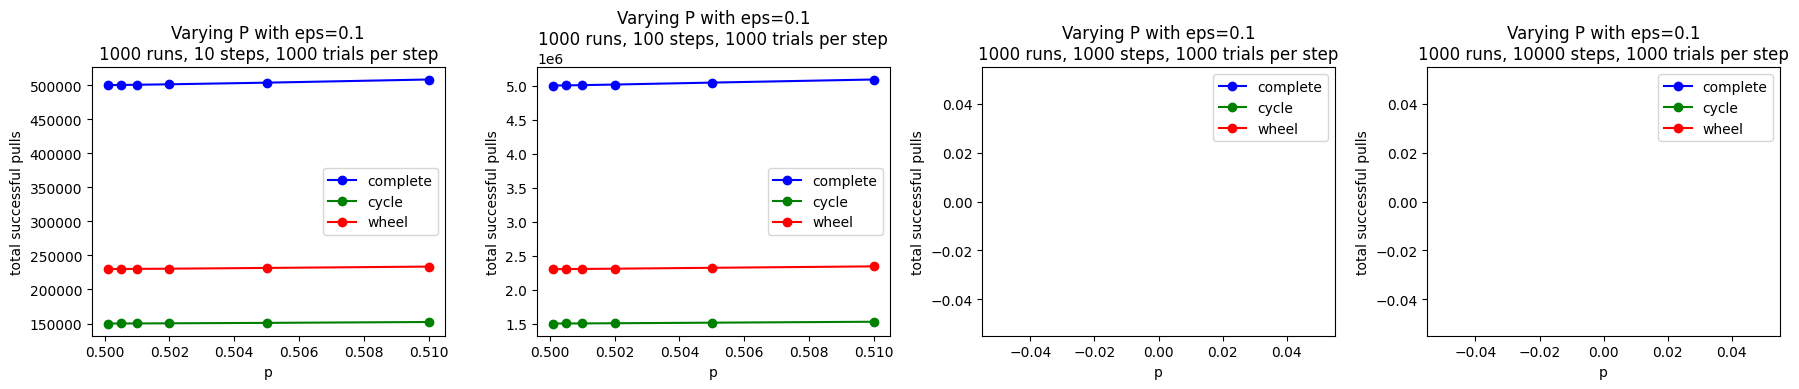

In [84]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, steps in enumerate([10, 100, 1000, 10000]):

    for ns in p_eps_df['network_structure'].unique():
        c = 'red' if ns == 'wheel' else 'blue' if ns == 'complete' else 'green'

        ns_df = p_eps_df[p_eps_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] == steps]
        ns_df = ns_df[ns_df['ps[1]'] <= .53]

        axs[idx].plot(ns_df['ps[1]'], ns_df['total_successful_pulls'], label=ns, color=c, marker='o')

    axs[idx].set_xlabel('p')
    axs[idx].set_ylabel('total successful pulls')
    axs[idx].set_title(f'Varying P with eps=0.1\n1000 runs, {steps} steps, 1000 trials per step')
    axs[idx].legend()

plt.tight_layout()
plt.show()

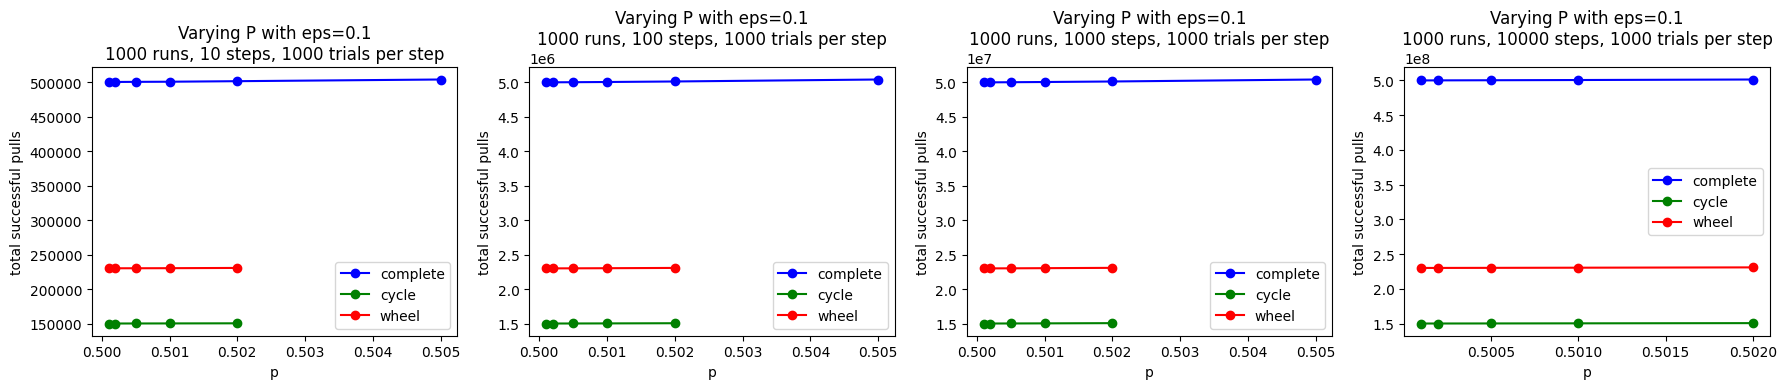

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, steps in enumerate([10, 100, 1000, 10000]):

    for ns in p_df['network_structure'].unique():
        c = 'red' if ns == 'wheel' else 'blue' if ns == 'complete' else 'green'

        ns_df = p_df[p_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] == steps]
        #ns_df = ns_df[ns_df['ps[1]'] <= .53]

        axs[idx].plot(ns_df['ps[1]'], ns_df['total_successful_pulls'], label=ns, color=c, marker='o')

    axs[idx].set_xlabel('p')
    axs[idx].set_ylabel('total successful pulls')
    axs[idx].set_title(f'Varying P with eps=0.1\n1000 runs, {steps} steps, 1000 trials per step')
    axs[idx].legend()

plt.tight_layout()
plt.show()

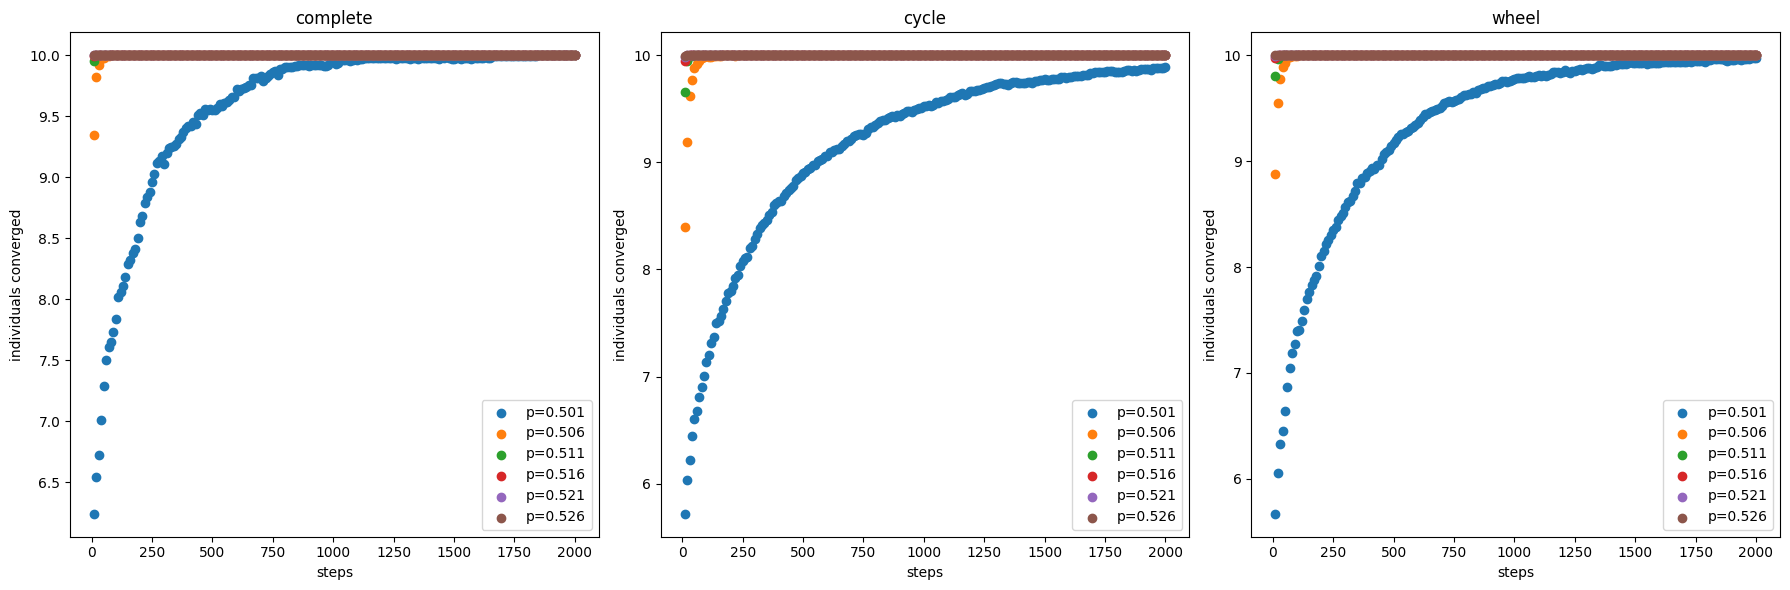

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for idx, ns in enumerate(p_eps_df['network_structure'].unique()):
    ns_df = p_eps_df[p_eps_df['network_structure'] == ns]

    for p_value in ns_df['ps[1]'].unique():
        if p_value > .53:
            continue

        p_df = ns_df[ns_df['ps[1]'] == p_value]
        p_df = p_df[p_df['n_steps'] <= 2000]


        axs[idx].scatter(p_df['n_steps'], p_df['individuals_converged'], label=f'p={p_value}')

    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('individuals converged')
    axs[idx].set_title(f'{ns}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

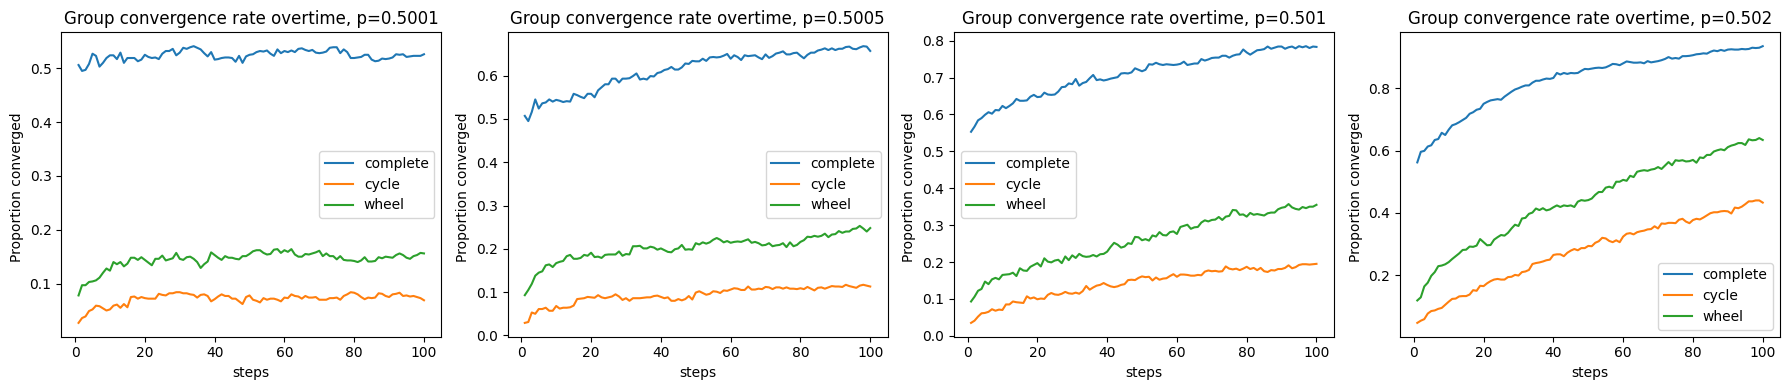

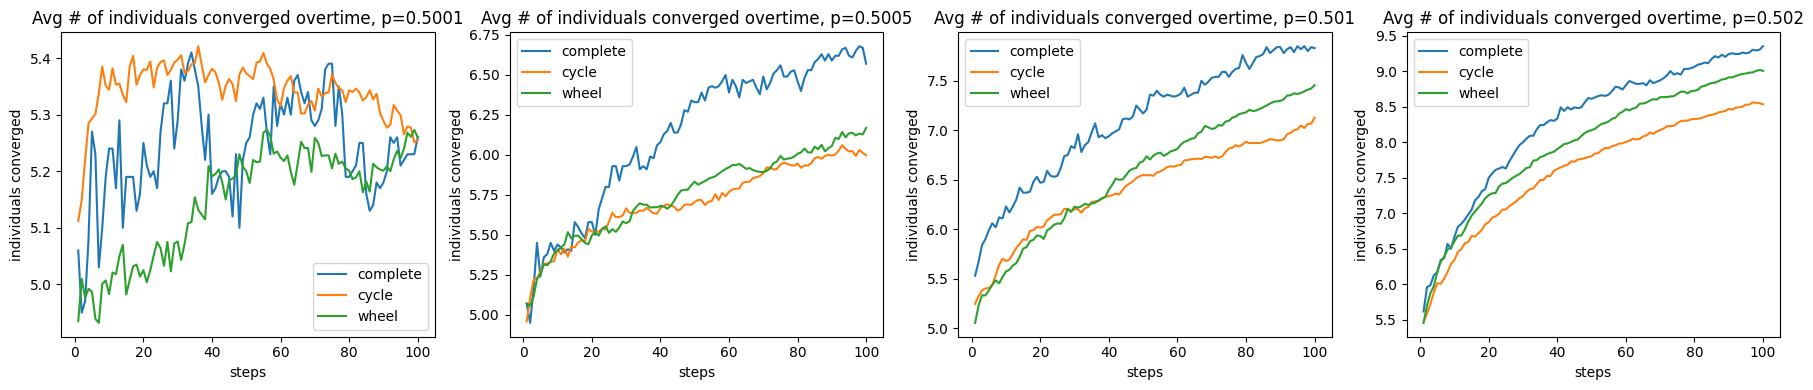

In [92]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, p in enumerate(p_eps_df['ps[1]'].unique()[:4]):

    max_step = [3000, 250, 100, 100][idx]

    p_df = p_eps_df[p_eps_df['ps[1]'] == p]

    for ns in p_df['network_structure'].unique():

        ns_df = p_df[p_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] <= max_step]

        axs[idx].plot(ns_df['n_steps'], ns_df['success_convergence_rate'], label=f'{ns}')

    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('Proportion converged ')
    axs[idx].set_title(f'Group convergence rate overtime, p={p}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

for idx, p in enumerate(p_eps_df['ps[1]'].unique()[:4]):

    max_step = [3000, 250, 100, 100][idx]

    p_df = p_eps_df[p_eps_df['ps[1]'] == p]

    for ns in p_df['network_structure'].unique():

        ns_df = p_df[p_df['network_structure'] == ns]
        ns_df = ns_df[ns_df['n_steps'] <= max_step]

        axs[idx].plot(ns_df['n_steps'], ns_df['individuals_converged'], label=f'{ns}')

    axs[idx].set_xlabel('steps')
    axs[idx].set_ylabel('individuals converged')
    axs[idx].set_title(f'Avg # of individuals converged overtime, p={p}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [94]:
df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_epsilon_adv_p5001.csv")

Text(0.5, 1.0, 'Avg # of individuals converged over time, p=0.5001')

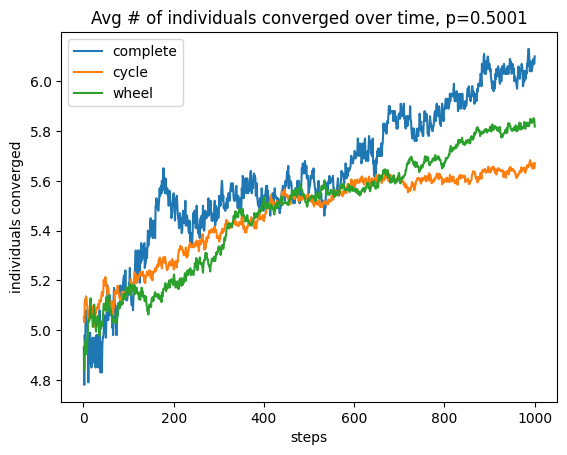

In [98]:
for ns in df['network_structure'].unique():
    ns_df = df[df['network_structure'] == ns]
    plt.plot(ns_df['n_steps'], ns_df['individuals_converged'], label=ns)
plt.legend()
plt.xlabel('steps')
plt.ylabel('individuals converged')
plt.title('Avg # of individuals converged over time, p=0.5001')

In [2]:
p_df = pd.read_csv("bernoulli_simulations/output_fall2024/zollman_p_adv.csv")

In [3]:
p_df

network_structure  ps[0]   ps[1]  num_agents  default  n_steps  n_runs  \
0               complete    0.5  0.5001          10      NaN        1    1000   
1               complete    0.5  0.5001          10      NaN        2    1000   
2               complete    0.5  0.5001          10      NaN        3    1000   
3               complete    0.5  0.5001          10      NaN        4    1000   
4               complete    0.5  0.5001          10      NaN        5    1000   
...                  ...    ...     ...         ...      ...      ...     ...   
159788          complete    0.5  0.5050          10      NaN     9789    1000   
159789          complete    0.5  0.5050          10      NaN     9790    1000   
159790          complete    0.5  0.5050          10      NaN     9791    1000   
159791          complete    0.5  0.5050          10      NaN     9792    1000   
159792          complete    0.5  0.5050          10      NaN     9793    1000   

        success_convergence_rate  individuals_converged  \
0                          0.485                   4.85   
1                          0.479                   4.79   
2                          0.487                   4.87   
3                          0.501                   5.01   
4                          0.505                   5.05   
...                          ...                    ...   
159788                     0.852                   8.52   
159789                     0.852                   8.52   
159790                     0.852                   8.52   
159791                     0.852                   8.52   
159792                     0.852                   8.52   

        total_successful_pulls  
0                 5.003212e+04  
1                 1.000294e+05  
2                 1.500431e+05  
3                 2.000769e+05  
4                 2.500852e+05  
...                        ...  
159788            4.936188e+08  
159789            4.936692e+08  
159790            4.937196e+08  
159791            4.937701e+08  
159792            4.938205e+08  

[159793 rows x 10 columns]

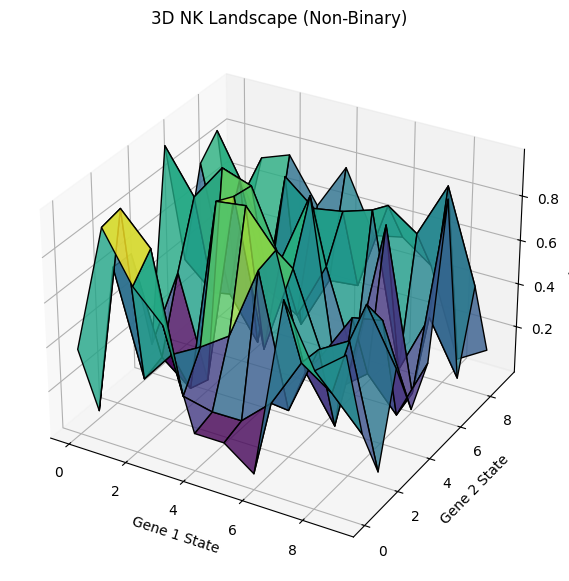

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class NKLandscape2D:
    def __init__(self, m, K=1, seed=None):
        """
        m: Number of states per gene (for each of the two genes)
        K: Number of dependencies for each gene (set to 1 here for simplicity)
        seed: Random seed for reproducibility
        """
        np.random.seed(seed)
        
        # Number of states for each of the two genes
        self.m = m
        self.K = K
        
        # Generate random fitness values for each state of gene combinations
        self.fitness_table = self._generate_fitness_table()

    def _generate_fitness_table(self):
        """Generate random fitness values for each possible combination of gene states."""
        fitness_table = {}
        all_combinations = list(itertools.product(range(self.m), repeat=2))
        
        for combo in all_combinations:
            fitness_table[combo] = np.random.uniform(0, 1)
        
        return fitness_table

    def evaluate(self, gene_values):
        """
        Get the fitness of a specific combination of two gene values.
        
        gene_values: A tuple of two gene values (e.g., (gene1_value, gene2_value)).
        
        Returns the fitness score of the given gene configuration.
        """
        return self.fitness_table.get(tuple(gene_values), 0)
    
    def generate_landscape(self):
        """Generate a 2D array representing the fitness landscape."""
        landscape = np.zeros((self.m, self.m))
        for i in range(self.m):
            for j in range(self.m):
                landscape[i, j] = self.evaluate((i, j))
        return landscape

# Parameters
m = 10  # Number of states per gene

# Create the NK landscape with 2 genes and visualize it
landscape = NKLandscape2D(m, K=1, seed=42)
fitness_landscape = landscape.generate_landscape()

# Plotting the 3D NK Landscape
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create grid for x and y coordinates
x = np.arange(m)
y = np.arange(m)
x, y = np.meshgrid(x, y)

# Plot a surface with the fitness values as the height (z-axis)
ax.plot_surface(x, y, fitness_landscape, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel("Gene 1 State")
ax.set_ylabel("Gene 2 State")
ax.set_zlabel("Fitness")
ax.set_title("3D NK Landscape (Non-Binary)")

plt.show()
